# Deskripsi Proyek

Anda bekerja di toko daring "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka. Anda perlu mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak. Dengan begitu, Anda bisa menemukan game yang paling berpotensial dan merencanakan kampanye iklannya.
_________________

Di depan Anda tersedia data dari tahun 2016. Mari bayangkan bahwa sekarang adalah bulan Desember tahun 2016 dan Anda sedang merencanakan kampanye untuk tahun 2017.
(Saat ini, yang terpenting bagi Anda adalah untuk mendapatkan pengalaman bekerja dengan data. Tidak masalah apakah Anda meramalkan penjualan tahun 2017 berdasarkan data dari tahun 2016 atau meramalkan penjualan tahun 2027 berdasarkan data dari tahun 2026.).
_________________
Dataset ini memuat singkatan. ESRB merupakan singkatan dari Entertainment Software Rating Board, yakni sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

## Memuat data dan mempelajari informasi keseluruhan pada data

### Memuat Libary yang dibutuhkan untuk pemrosesan data

In [1]:
# Memuat semua library

# import pandas and numpy untuk proses dan manipulasi data
import pandas as pd
import numpy as np 
import random
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# import math dan scipy untuk perhitungan statistika 
import math as mt
from math import factorial
from scipy import stats as st

# import matplotlib untuk data visualisasi
import matplotlib.pyplot as plt 
from matplotlib import pyplot
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

# tree map visualization
!pip install squarify
import squarify

# Import seaborn untuk statistika data visualisasi
import seaborn as sns

# import date dan time untuk merubah tipe data
import time
import datetime
from datetime import datetime

# import warnings untuk menghapus peringatan saat dataset di manipulasi
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)


### Memuat Data dari csv agar dapat dijalankan dengan pandas untuk menjadi DataFrame

In [2]:
data = pd.read_csv('/datasets/games.csv')

###  Memuat Informasi dari dataset

In [3]:
# Informasi dataset

print('Informasi dari dataset')
data

Informasi dari dataset


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
print('informasi tipe data & panjang baris , column dari dataset')
data.info()

informasi tipe data & panjang baris , column dari dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print('distribusi statisik pada dataset')
data.describe()

distribusi statisik pada dataset


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
print('memeriksa nilai yang hilang / na')
data.isna().sum()

memeriksa nilai yang hilang / na


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
print('panjang baris dari dataset :')
data.shape

panjang baris dari dataset :


(16715, 11)

In [8]:
print('memeriksa duplikasi pada dataset :')
print('nilai duplikat pada dataset :', data.duplicated().sum())

memeriksa duplikasi pada dataset :
nilai duplikat pada dataset : 0


In [9]:
# Fungsi untuk menghitung persentase dari column yang hilang 

def missing_values_table(data):
        # Total nilai yang hilang
        mis_val = data.isnull().sum()
        
        # Persentase nilai yang hilang
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Merubah nama table
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Nilai yang hilang', 1 : '% Total Nilai dataset'})
        
        # Mengurutkan table berdasarkan persentase tertinggi
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% Total Nilai dataset', ascending=False).round(1)
        
        # Menampilkan beberapa informasi
        print ("Dataset yang dipilih " + str(data.shape[1]) + "  column.\n"      
            "Terdapat " + str(mis_val_table_ren_columns.shape[0]) +
              " column yang memiliki nilai yang hilang.")
        
        # Return dataset dengan nilai yang hilang
        return mis_val_table_ren_columns

In [10]:
# Menampilkan hasil dari fungsi dataset dengan nilai yang hilang

missing_values_table(data)

Dataset yang dipilih 11  column.
Terdapat 6 column yang memiliki nilai yang hilang.


,Nilai yang hilang,% Total Nilai dataset
Critic_Score,8578,51.3
Rating,6766,40.5
User_Score,6701,40.1
Year_of_Release,269,1.6
Name,2,0.0
Genre,2,0.0


### Kesimpulan :

1. Dari hasil analisis awal pada dataset di dari 11 column terdapat 6 column yang memiliki nilai yang hilang : critic_score dengan jumlah 8578 / persentasi 51.3%, Rating dengan jumlah 6766 / persentasi 40.5%, User_Score dengan jumlah 6701 / persentasi 40.1%, Year_of_Release dengan jumlah 269 / persentasi 1.6%.
______________________

2. Selanjutnya kita akan mengubah tipe data dengan tipe data yang sesuai untuk langkah analisis selanjutnya, yakni pada column Year_of_Realese dan User_Score akan kita ubah menjadi tipe data interger.
______________________

3. Pada column Name & Genre teradapat nilai yang error dimana terdeteksi 2 value dengan nilai yang hilang pada baris columnya.
______________________

4. Pada Column Year_of_release terdapat nilai yang hilang secara acak (Missing at Random). & pada column Critic_Score, User_score dan Rating terdapat nilai hilang tidak secara acak (Missing not at Random).
______________________

5. Selanjutnya Kita juga perlu mengidentifikasi lebih detail mengenai nilai yang hilang pada column yang teridentifikasi. dan mengganti tipe data yang dibutuhkan. 

##  Data Preperation

### Mengubah nama column

In [11]:
# Fungsi mengubah nama column
#def lowercase_columns(data):
   # return data.rename(str.lower, axis='columns')

#data = lowercase_columns(data)
#print(data.columns)    

In [12]:
# merubah nama column pada dataset 

data.columns = data.columns.str.lower()

print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Menangani nilai yang hilang

In [13]:
# Menampilkan hasil dari fungsi dataset dengan nilai yang hilang

missing_values_table(data)

Dataset yang dipilih 11  column.
Terdapat 6 column yang memiliki nilai yang hilang.


,Nilai yang hilang,% Total Nilai dataset
critic_score,8578,51.3
rating,6766,40.5
user_score,6701,40.1
year_of_release,269,1.6
name,2,0.0
genre,2,0.0


#### Mengatasi Nilai yang hilang pada column name & genre

Kita dapat mendrop nilai yang hilang pada column name dan genre, dikarenakan tidak ada cara lain untuk mengisi nilai yang hilang pada column name & genre baik menggunakan median atau mean pada value ini. dan juga karena persentasi nilai yang hilang sangat rendah maka kita bisa drop value nya tanpa menghilangkan analisis statistiknya.


In [14]:
# Memfilter nilai yang hilang pada column name dan genre

data.loc[(data['name'].isna()) & (data['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
# Drop 'NaN' pada column name dan genre

data = data.dropna(subset= ['name', 'genre']).reset_index(drop=True)

In [16]:
data[['name', 'genre']].isnull().sum()

name     0
genre    0
dtype: int64

#### Mengatasi Nilai yang hilang year_of_release

In [17]:
# Filter nilai yang hilang pada column years_of_release

data.loc[(data['year_of_release'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Untuk mengganti nilai yang hilang pada column years_of_release, pertama kita mencari nilai unik untuk mendapatkan daftar kemungkinan tahun rilis pada column nama game tersebut, kemudian memilih nilai acak dari daftar tersebut dan menetapkan ke tahun dimana game itu di rilis dalam dataframe. untuk nama yang unik dengan nilai yang hilang kita akan menggunakan fungsi mode() untuk mengisi nilai yang hilang pada kolom year_of_release. 

In [18]:
# Fungsi untuk menetapkan nilai acak pada column year of release
def fill_in_year_of_release(data):
    # mendapatkan unik value dari nama games
    for name in data['name'].unique().tolist():
        # mendapatkan spesifik nama games untuk mengisi nilai nan di column year_of_release
        specific_name_data = data[data['name'] == name].dropna()['year_of_release']
        name_year_list = specific_name_data.unique().tolist()
        # looping untuk nilai yang hilang menetapkan nilai acak pada name untuk menjadi default value
        if name_year_list != []:
            data.loc[(data['name'] == name) & (data['year_of_release'] != data['year_of_release']), 'year_of_release'] = random.choice(name_year_list)
        else:
            data.loc[(data['name'] == name) & (data['year_of_release'] != data['year_of_release']), 'year_of_release'] = data['year_of_release'].mode()[0]

In [19]:
# Menjalankan fungsi untuk nilai yang hilang pada column year_of_release

fill_in_year_of_release(data)

In [20]:
# memfilter kembali nilai yang teridentifikasi terdapat nilai yang hilang

data.loc[(data['year_of_release'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Mengatasi Nilai yang hilang pada column critic_score 

In [21]:
# Filter nilai yang hilang pada column critic_score

data.loc[(data['critic_score'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Untuk mengisi nilai yang hilang pada colum critic score, kita akan mengambil nilai yang unik berdasarkan column platform untuk dijadikan value default dalam pemberian nilai pada platform game lalu mengisi nilai yang hilang tersebut dengan median dari penilian critic_score tersebut. 

In [22]:
# Fungsi untuk menetapkan nilai acak pada column critic_score
def fill_in_critic_score(data):
    # mendapatkan unik value dari column platfrom
    for critic_score in data['platform'].unique().tolist():
        # mendapatkan nilai spesifik dari column platform
        specific_score_df = data[data['platform'] == critic_score].dropna()['critic_score']
        critic_score_list = specific_score_df.unique().tolist()
        # looping untuk nilai yang hilang menetapkan nilai acak pada platform untuk menjadi default value
        if critic_score_list != []:
            data.loc[(data['platform'] == critic_score) & (data['critic_score'] != data['critic_score']), 'critic_score'] = random.choice(critic_score_list)
        else:
            data.loc[(data['platform'] == critic_score) & (data['critic_score'] != data['critic_score']), 'critic_score'] = data['critic_score'].median()

In [23]:
# Menjalankan fungsi untuk nilai yang hilang pada column critic score

fill_in_critic_score(data)

In [24]:
# Filter nilai yang hilang pada column critic_score

data.loc[(data['critic_score'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Nilai yang hilang pada column user_score

In [25]:
# Filter nilai yang hilang pada column user_score

data.loc[(data['user_score'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,69.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,69.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,69.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,48.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,33.0,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,45.0,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,83.0,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,73.0,NaN,NaN


Untuk mengisi nilai yang hilang pada column user_score, kita akan mengambil nilai yang unik berdasarkan column platform untuk dijadikan value default dalam pemberian nilai pada platform game lalu mengisi nilai yang hilang tersebut dengan median dari penilian user_score tersebut. dan untuk nilai 'tbd' pada user score karena kemungkinan review pada games tersebut tidak ada yang memberikan insight maka nilai tbd akan di ganti menjadi nilai string 'NaN'. 

In [26]:
# Fungsi untuk menetapkan nilai acak pada column user_score
def fill_in_user_score(data):
    data['user_score'] = data['user_score'].replace('tbd', np.nan)
    # mendapatkan unik value dari column platfrom
    for user_score in data['platform'].unique().tolist():
        # mendapatkan nilai spesifik dari column platform
        specific_score_data = data[data['platform'] == user_score].dropna()['user_score']
        user_score_list = specific_score_data.unique().tolist()
        # looping untuk nilai yang hilang menetapkan nilai acak pada platform untuk menjadi default value
        if user_score_list != []:
            data.loc[(data['platform'] == user_score) & (data['user_score'] != data['user_score']), 'user_score'] = random.choice(user_score_list)
        else:
            data.loc[(data['platform'] == user_score) & (data['user_score'] != data['user_score']), 'user_score'] = data['user_score'].median()   

In [27]:
# Menjalankan fungsi untuk nilai yang hilang pada column critic score

fill_in_user_score(data)

In [28]:
# Filter nilai yang hilang pada column user_score

data.loc[(data['user_score'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Mengatasi Nilai yang hilang pada column rating

In [29]:
# Filter nilai yang hilang pada column user_score

data.loc[(data['rating'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.0,7.6,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,69.0,7.6,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,69.0,7.6,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,69.0,7.6,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,48.0,9.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,33.0,8.9,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,45.0,1.2,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,83.0,5.6,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,73.0,3,NaN


Untuk mengatasi nilai yang hilang pada column rating kita akan mengambil nilai yang unik pada column platform untuk dijadikan value default dalam pemberian nilai pada platform game lalu mengisi nilai yang hilang dengan mode() dari penilaian rating berdasarkan column tersebut.

In [30]:
# Fungsi untuk menetapkan nilai acak pada column rating
def fill_in_rating(data):
    # mendapatkan unik value dari column platfrom
    for rating in data['platform'].unique().tolist():
        specific_rating_data = data[data['platform'] == rating].dropna()['rating']
        rating_list = specific_rating_data.unique().tolist()
         # looping untuk nilai yang hilang menetapkan nilai acak pada platform untuk menjadi default value
        if rating_list != []:
            data.loc[(data['platform'] == rating) & (data['rating'] != data['rating']), 'rating'] = random.choice(rating_list)
        else:
            data.loc[(data['platform'] == rating) & (data['rating'] != data['rating']), 'rating'] = data['rating'].mode()[0]   
              

In [31]:
# Menjalankan fungsi untuk nilai yang hilang pada column rating

fill_in_rating(data)

In [32]:
# Filter nilai yang hilang pada column user_score

data.loc[(data['rating'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [33]:
# Melihat dataset setelah dimanipulasi 

data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.0,7.6,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,69.0,7.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,33.0,8.9,E10+
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,45.0,1.2,E
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,83.0,5.6,M
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,73.0,3,E


In [34]:
# Menampilkan kembali persentase nilai yang hilang pada dataset

missing_values_table(data)

Dataset yang dipilih 11  column.
Terdapat 0 column yang memiliki nilai yang hilang.


,Nilai yang hilang,% Total Nilai dataset


#### Kesimpulan :

Setelah memproses nilai yang hilang pada kolom name, genre, years_of_release, critic_score, user_score & rating, dimana kolom name, gender kita menghapus baris dengan nilai yang hilang dikarenakan nilai yang hilang kurang dari 1%, dan pada kolom years_of_release, critic_score, user_score & rating kita menerapkan fungsi khusu untuk mengisi nilai yang hilang dengan nilai acak dari nilai unik pada column name dan platform, dengan kondisi jika nilia unik kosong, maka nilai yang hilang diisi dengan median atau mode pada column yang terdapat nilai yang hilang serta singkatan dari 'tbd diubah menjadi string 'NaN' pada dataset. setelah memeriksa kembali nilai yang hilang dapat dilihat bahwa tidak ada nilai yang hilang kembali sehingga dataset siap untuk dianlisis. sebelum melanjutkan ke tahap analisis kita perlu mengkonversi tipe data ke tipe yang tepat sesuai dengan valuenya.


### Mengkonversi Tipe data 

In [35]:
# Merubah tipe data ke tipe data yang sesuai

def convert_to_type(data, cols, type_val):
    for col in cols:
        data[col] = data[col].astype(type_val)
        
convert_to_type(data, ['name', 'platform', 'genre', 'rating'], str)
convert_to_type(data, ['year_of_release', 'critic_score'], int)
convert_to_type(data, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'user_score'], float)

In [36]:
# Melihat informasi tipedata pada dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


Kita dapat melihat tipe data sudah diubah ke tipe data yang sesuai

### Menghitung Total penjualan di semua wilayah


In [37]:
# Total penjualan di semua wilayah

data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


In [38]:
# Melihat total penjualan pada dataset

data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.6,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69,7.6,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,33,8.9,E10+,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,45,1.2,E,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,83,5.6,M,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,73,3.0,E,0.01


Kesimpulan :

Pada tahap ini kita telah mempersiapkan data dengan mengubah nama column menjadi lower case, kita mendrop nilai yang hilang pada column name dan genre, serta mengisi nilai yang hilang pada column years_of_release, critic_score, user_score & rating kita menerapkan fungsi khusu untuk mengisi nilai yang hilang dengan nilai acak dari nilai unik pada column name dan platform, dengan kondisi jika nilia unik kosong, maka nilai yang hilang diisi dengan median atau mode pada column yang terdapat nilai yang hilang serta singkatan dari 'tbd diubah menjadi string 'NaN' pada dataset, lalu merubah tipedata ke tipe data yang sesuai dan menghitung total penjualan pada seluruh wilayah. 


## Data Analyzing

### Banyaknya Game Yang Dirilis Pada Tahun Yang Berbeda 

In [39]:
# Membuat dataset baru untuk dimanipulasi 

games_data = data.copy()

In [40]:
# Mengelompokkan tahun game dirilis dan menghitung game yang dirilis

games_data_grouped = (games_data[['year_of_release', 'name']]
              .groupby('year_of_release')
              .agg('count')
              .sort_values('year_of_release')
              .rename(columns={'name':'games_count'}).reset_index()
)

In [41]:
# Menampilkan dataset 

games_data_grouped

,year_of_release,games_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [42]:
# Fungsi untuk membuat plot lollipop chart

def plot_lollipop(data, x, y, title, ylabel):
    fig, ax=plt.subplots(figsize=(13,6))
    ax.vlines(x = data[x], ymin=0, ymax = data[y], color='purple', alpha=0.5, linewidth=2)
    ax.scatter(x = data[x], y= data[y], s= 75, color='blue', alpha=0.7)
    ax.set_title(title, fontdict={'size':12})
    ax.set_ylabel(ylabel, fontdict={'size':12})
    ax.set_xlabel(x, fontdict={'size':12})
    ax.set_xticks(data[x])
    ax.set_xticklabels(data[x], rotation=90, fontdict={'horizontalalignment':'right', 'size':10})    
    

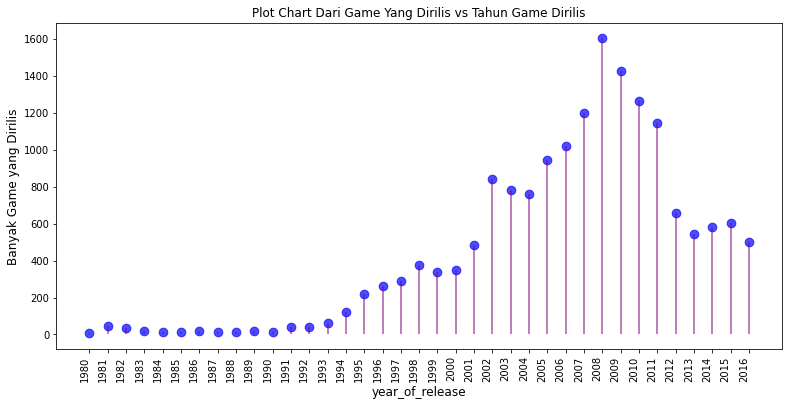

In [43]:
# Menjalankan fungsi plot 

plot_lollipop(games_data_grouped, 'year_of_release', 'games_count', 'Plot Chart Dari Game Yang Dirilis vs Tahun Game Dirilis', 'Banyak Game yang Dirilis')

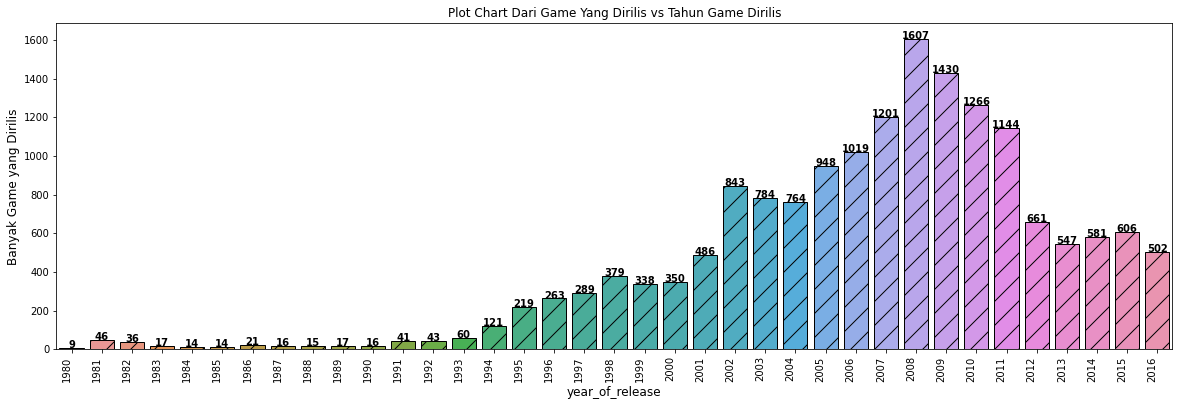

In [44]:
# Plot bar dari jumlah game yang dirilis vs tahun game dirilis

fig, ax = plt.subplots(figsize=(20,6))
ax = sns.barplot(data= games_data_grouped, x='year_of_release', y='games_count', edgecolor='black', hatch='/')
ax.set_title('Plot Chart Dari Game Yang Dirilis vs Tahun Game Dirilis', fontdict={'size':12})
ax.set_ylabel('Banyak Game yang Dirilis', fontdict={'size':12})
ax.set_xlabel('year_of_release', fontdict={'size':12})
ax.set_xticklabels(games_data_grouped['year_of_release'], rotation=90, fontdict={'horizontalalignment':'right', 'size':10});

# Value Label 
for index, row in games_data_grouped.iterrows():
    ax.text(row.name, row.games_count, round(row.games_count, 2), color='black', fontweight='bold' , ha="center")

Kesimpulan : 

Dapat dilihat dari plot lollipop plot diatas dimana game terbanyak dirilis pada tahun 2001 sd 2016. ini sangat masuk akal karena bertepatan dengan munculya web 2.0 dan internet pada dekadr pertama abad 21. dimana banyak game online, perangkat game seluler, layanan streaming sehingga banyak game dirilis karena orang dapat bermain game konsol di rumah. sebagian besar game dirilis antara tahun 2005 dan 2011, dan tahun dengan game dirilis terendah ada pada tahun 1980. penurunan jumlah game yang diliris mengalami penurunun setelah tahun 2008 kemungkinan dengan meningkatnya game seluler dari tahun 2008 dan seterusnya.

#### Data Pada Setiap Periode Tahun Game di Rilis 

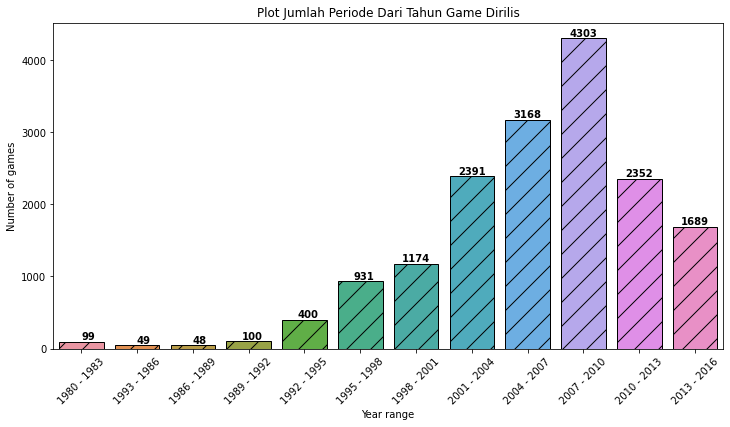

In [45]:
# Plot dari jumlah game berdasarkan rentang tahun dirilis 

bins = np.arange(games_data['year_of_release'].min(), games_data['year_of_release'].max()+1, 3)
bin_label = ['1980 - 1983', '1993 - 1986', '1986 - 1989', '1989 - 1992', '1992 - 1995', '1995 - 1998', '1998 - 2001', '2001 - 2004', '2004 - 2007', '2007 - 2010', '2010 - 2013', '2013 - 2016']
plot_bar = games_data.groupby(pd.cut(games_data['year_of_release'], bins=bins)).agg({'year_of_release': 'count'}).rename(columns={'year_of_release':'Number of games'})
plot_bar['Year range'] = bin_label
fig, ax=plt.subplots(figsize=(12,6))
ax = sns.barplot(x='Year range', y= 'Number of games', data = plot_bar, edgecolor='black', hatch='/')
ax.set_title('Plot Jumlah Periode Dari Tahun Game Dirilis', fontdict={'size':12})
ax.set_xticklabels(bin_label, rotation=45);

for i, v in enumerate(plot_bar.iloc[:,0].values):
    ax.text(i + 0.25, v + 3, str(v), color='black', fontweight='bold', fontdict={'horizontalalignment':'right', 'verticalalignment':'bottom', 'size':10})


Kesimpulan: 

Dari plot lollipop sebelumnya, kita dapat melihat bahwa tahun antara 2001 dan 2016 memiliki game yang paling banyak dirilis. Setelah itu kita mengelompokkan tahun berdasarkan rentang dan mencoba melihat seberapa signifikan game dirilis berdasarkan rentang periode game dirilis. disini kita membagi tahun dalam dua kelompok dengan interval tiga tahun. dan dapat diamati dari diagram batang bahwa untuk periode 2000 sd 2016 dengan jumlah game yang signifikan antara tahun 2007 - 2010 yang memiliki jumlah yang paling signifikan terbesar dalam data.


### Variasi Penjualan Dari Satu Platform ke Platform Lainnya 

In [46]:
# Fungsi untuk membuat barplot

def plot_snsbar(data, x, y, title):
    xlabel = str(x.replace('_', ' ').capitalize())
    ylabel = str(y.replace('_', ' ').capitalize())
    # create grouped data
    data = data.groupby([x])[y].count().sort_values(ascending=False).reset_index()
    fig, ax=plt.subplots(figsize=(12,6))
    ax = sns.barplot(x = x, y = y, data=data)
    ax.set_title(title, fontdict={'size':12})
    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_xticklabels(data[x], rotation=90);

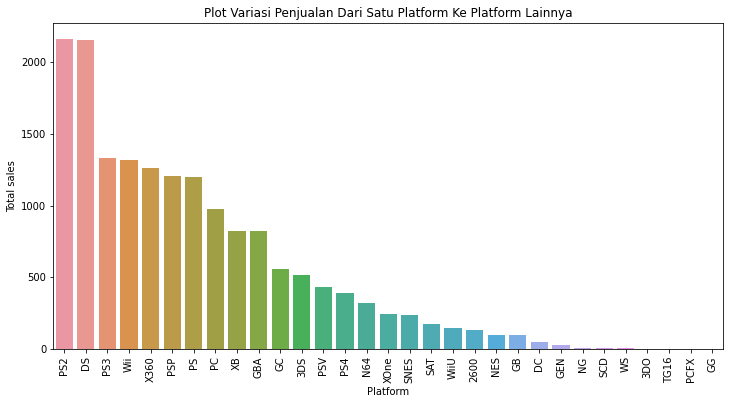

In [47]:
# Menjalankan Fungsi Barplot

# plot of sales variation from platform to platform
plot_snsbar(games_data, 'platform', 'total_sales', 'Plot Variasi Penjualan Dari Satu Platform Ke Platform Lainnya')

In [48]:
platform_grouped = (games_data[['platform', 'total_sales']]
              .groupby('platform')
              .agg('count')
              .sort_values('total_sales').reset_index()
)

In [49]:
platform_grouped

,platform,total_sales
0,GG,1
1,PCFX,1
2,TG16,2
3,3DO,3
4,WS,6
5,SCD,6
6,NG,12
7,GEN,27
8,DC,52
9,GB,98


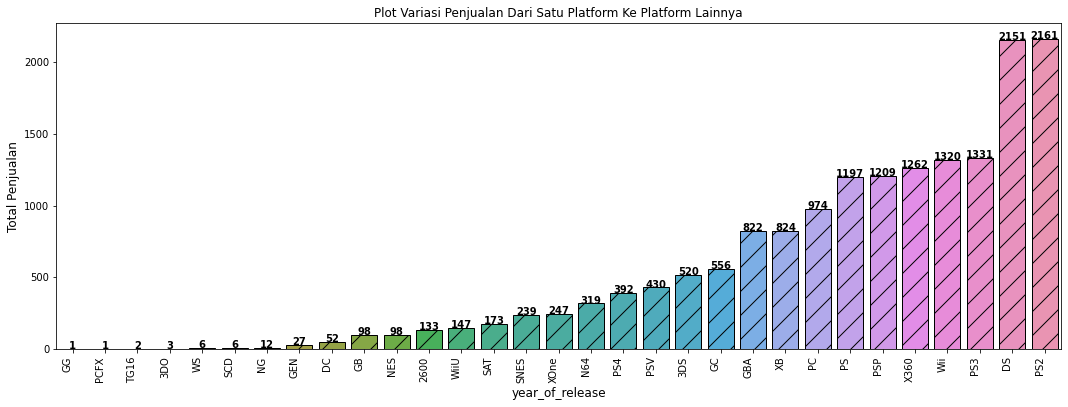

In [50]:
# Plot dari  Variasi Penjualan Dari Satu Platform ke Platform Lainnya
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.barplot(data= platform_grouped , x='platform', y='total_sales', edgecolor='black', hatch='/', errwidth=0)
ax.set_title('Plot Variasi Penjualan Dari Satu Platform Ke Platform Lainnya', fontdict={'size':12})
ax.set_ylabel('Total Penjualan', fontdict={'size':12})
ax.set_xlabel('year_of_release', fontdict={'size':12})
ax.set_xticklabels(platform_grouped['platform'], rotation=90, fontdict={'horizontalalignment':'right', 'size':10});

# Value Label 
for index, row in platform_grouped.iterrows():
    ax.text(row.name, row.total_sales, round(row.total_sales, 2), color='black', fontweight='bold' , ha="center")

Kesimpulan :

Dapat Kita lihat dari barplot variasi dari penjualan platform game, dimana 5 teratas dari platform dengan penjualan terbanyak adalah PS2, DS, PS3, Wii dan X360. dan platfor dengan penjualan terendah adalah SCD, WS, 3DO, TG16, PCFX. Kita dapat memplot distribusi total penjulan berdasarkan tahun rilis dari setiap platform. ini akan memberikan kita gambaran mengenai platform populer dan durasu munculnya platform yang baru.

#### Memilih Platform Dengan Penjualan Terbesar dan Membuat Distribusi Berdasarkan Data PerTahun.


In [51]:
# Fungsi Untuk Memplot distribusi chhart dari matplotlib

# function to plot distribution chart with matplotlib
def plot_distribution(data, x, y, column ='', value='', func=np.sum):
    if column != '' and value != '':
        filter_data = data[data[column] == value]
        plot_data = filter_data.pivot_table(index=x, values=y, aggfunc=func)
        values_to_plot = plot_data[y].values
    else:
        plot_data = data.pivot_table(index=x, values=y, aggfunc=func)
        values_to_plot = plot_data[y].values
    xlabel = x.replace('_', ' ').capitalize()
    ylabel = str(y.replace('_', ' ').capitalize())
    title = str(value) + " - " + ylabel + " vs. " + xlabel
    ax = plot_data.plot(kind='bar', figsize=(12,6), rot=45, title=title, edgecolor='silver', legend=False)
    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_title(title, fontdict={'size':12}, fontweight='bold')
   
     # Mengatur Keterangan diatas bar 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontweight='bold', color='dodgerblue', horizontalalignment='left', size=10)

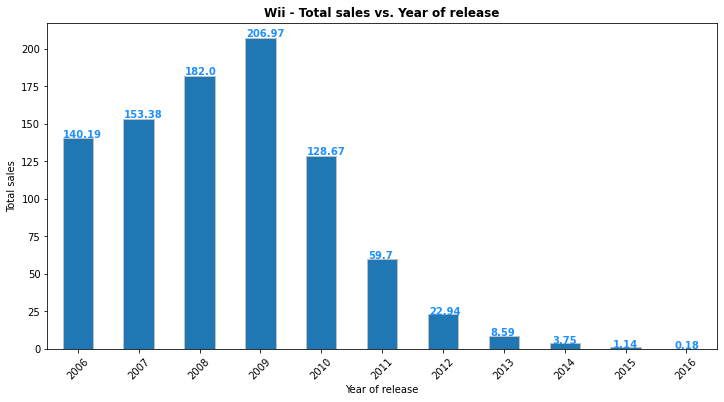

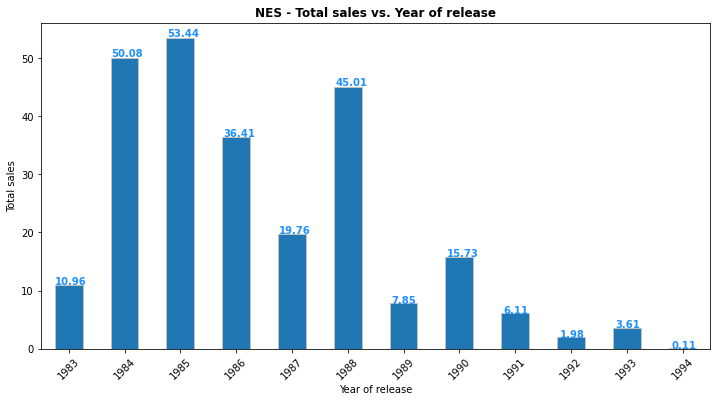

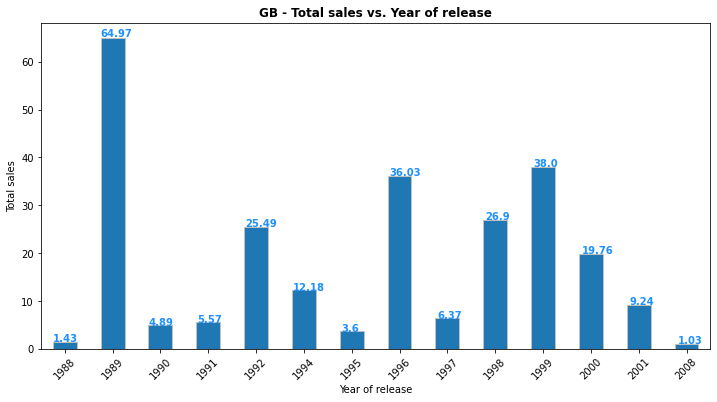

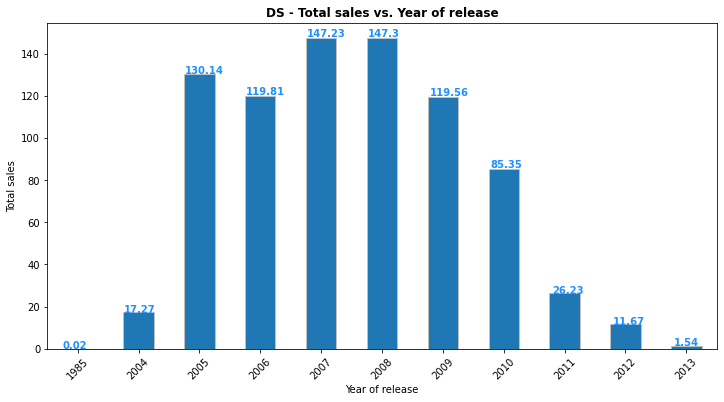

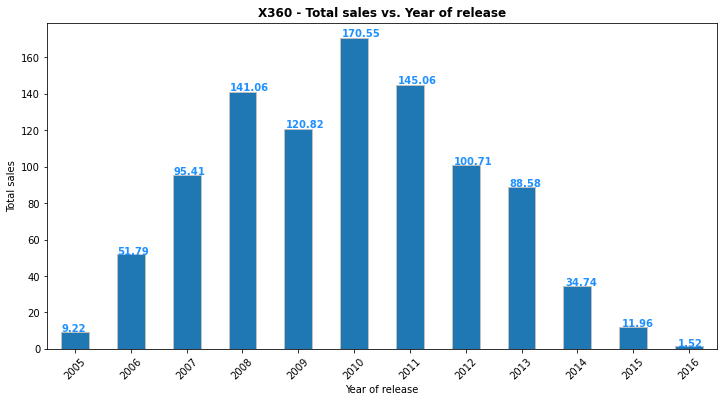

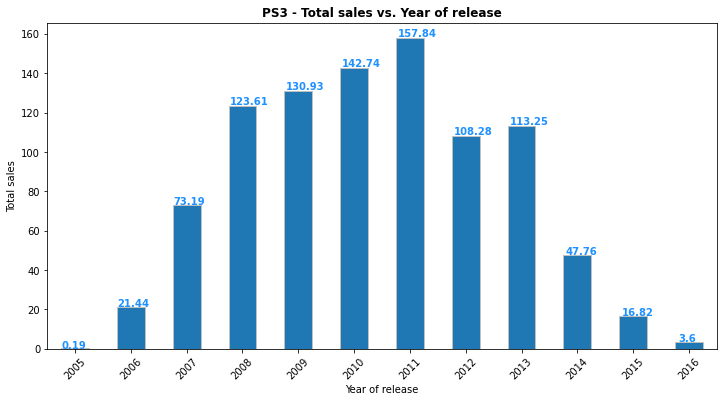

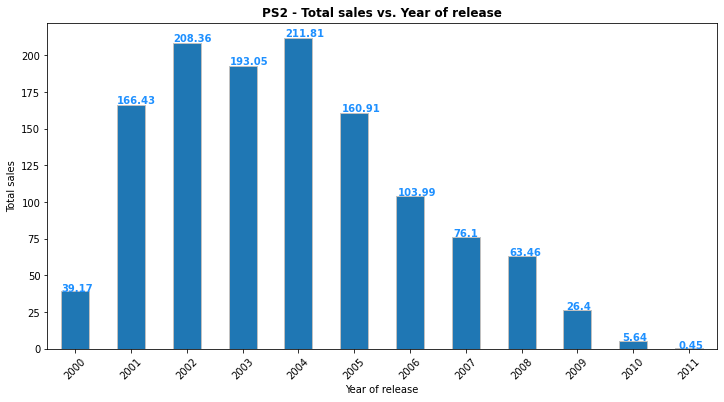

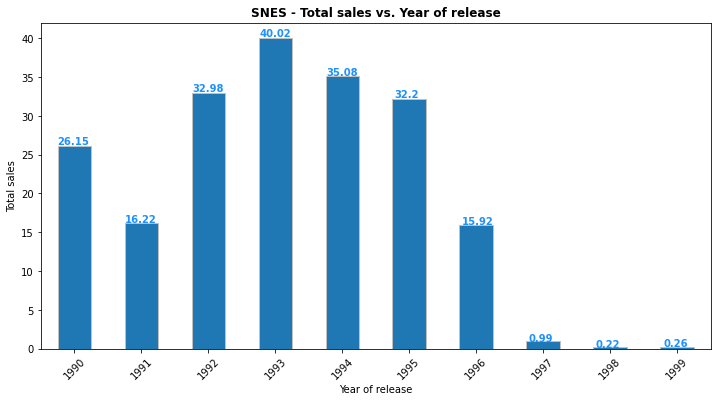

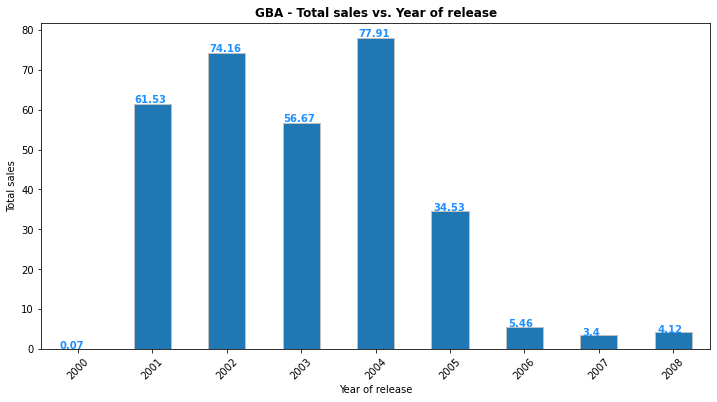

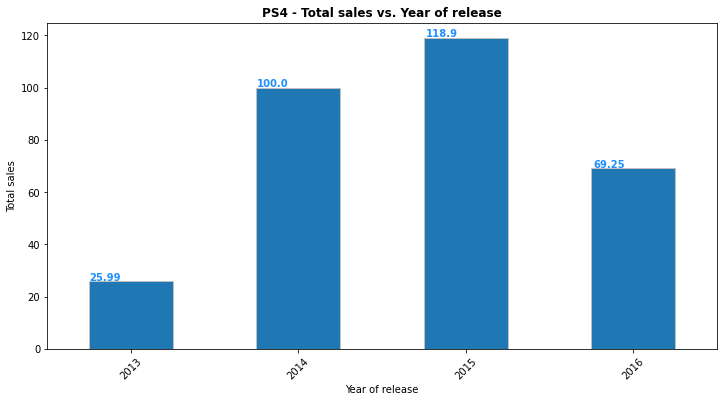

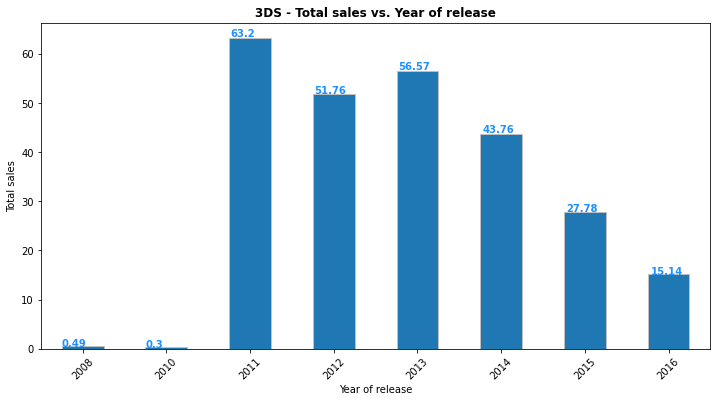

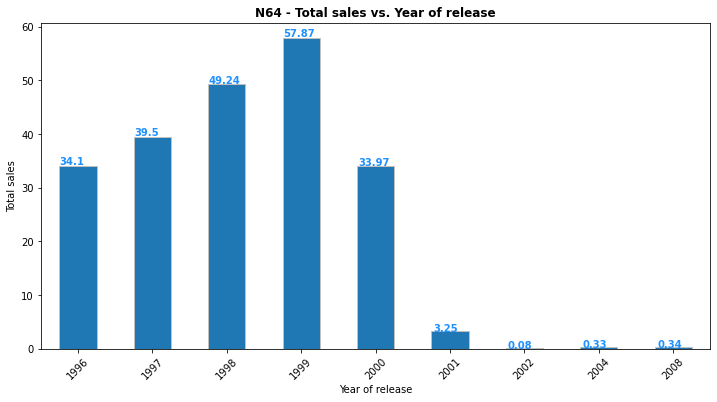

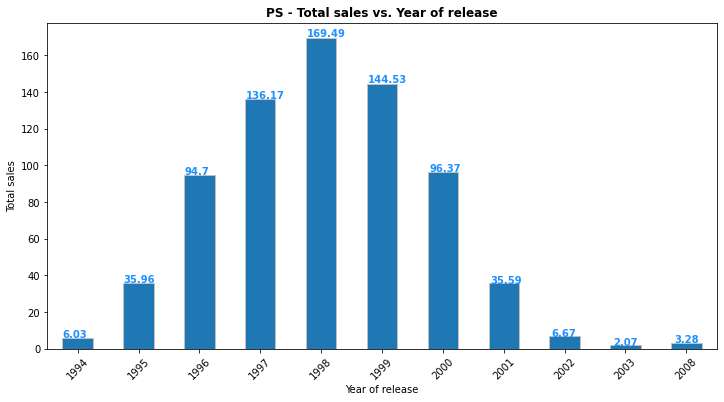

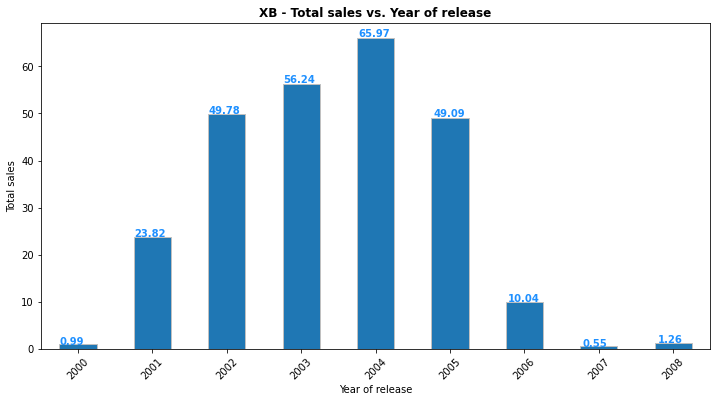

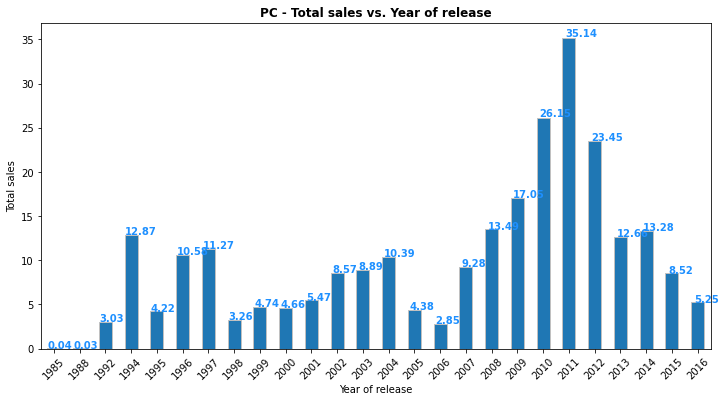

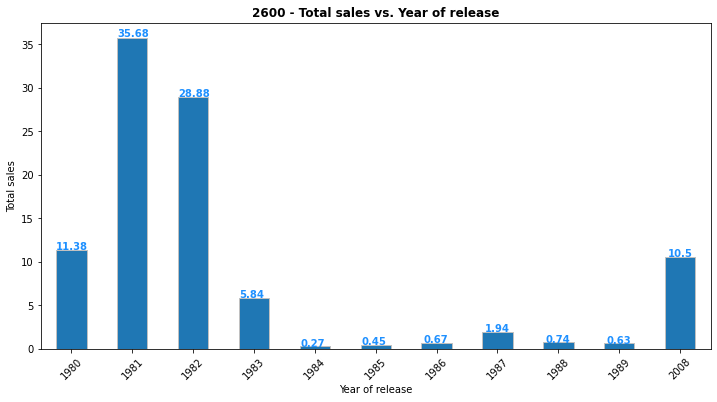

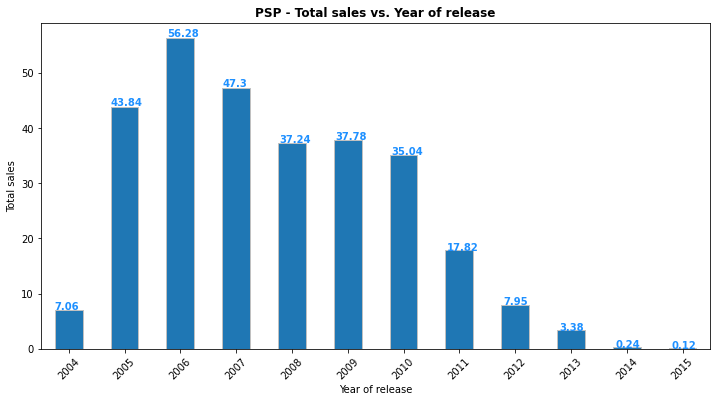

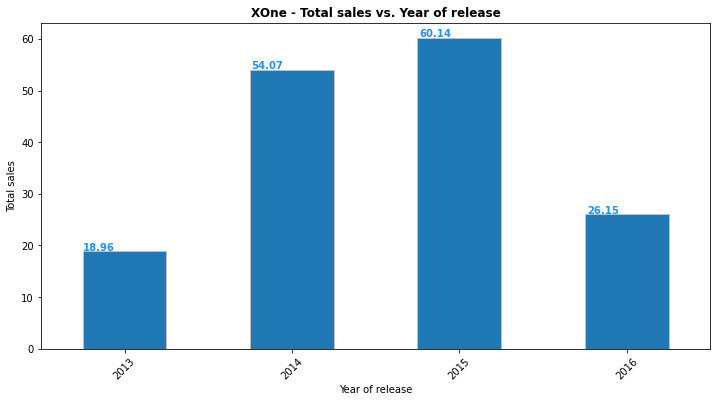

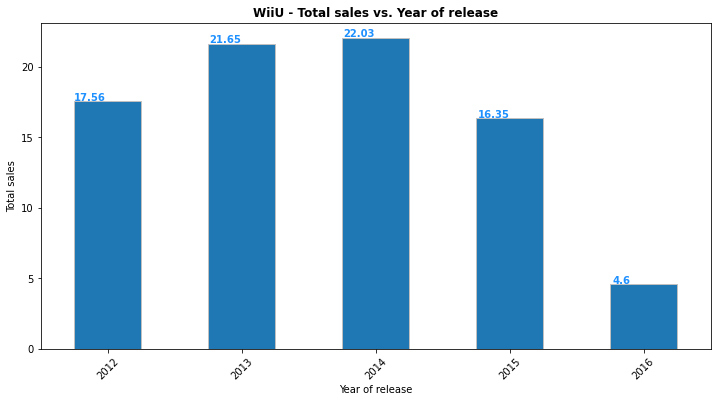

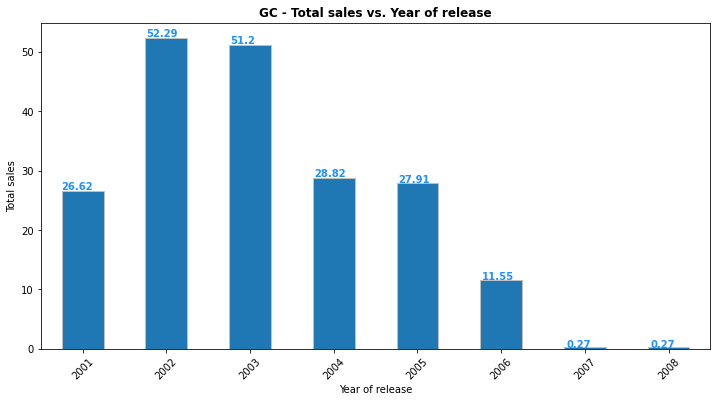

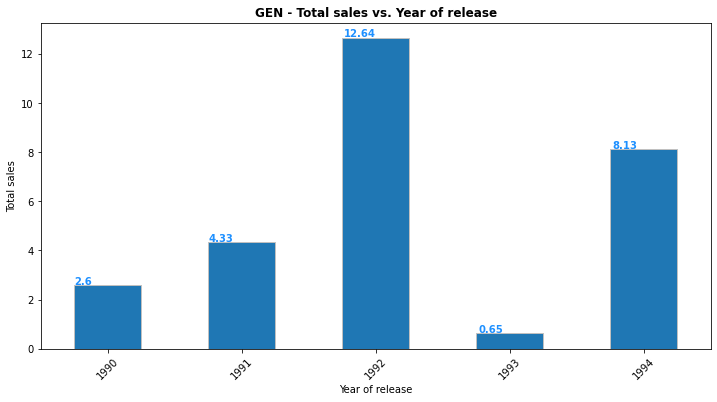

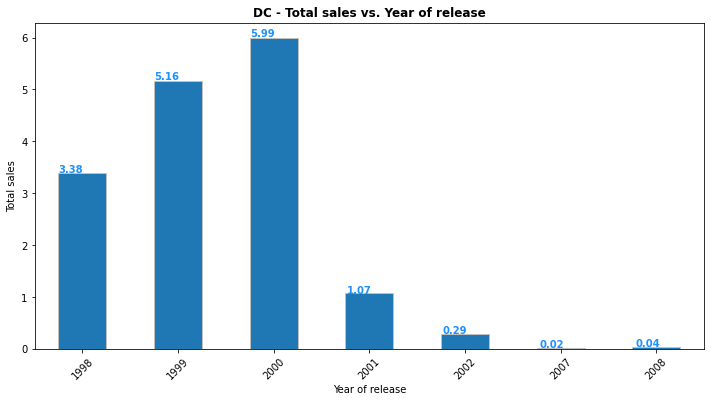

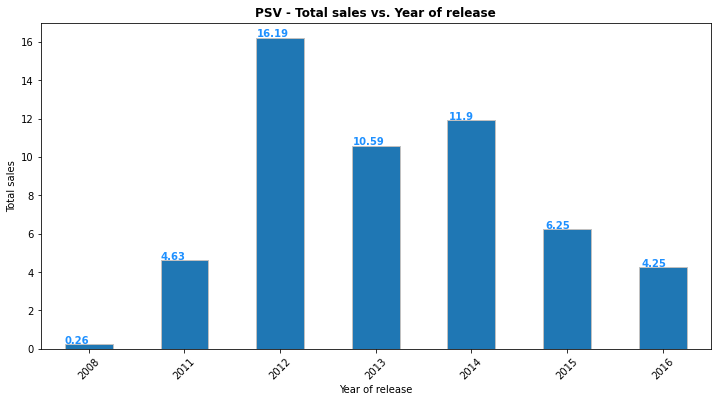

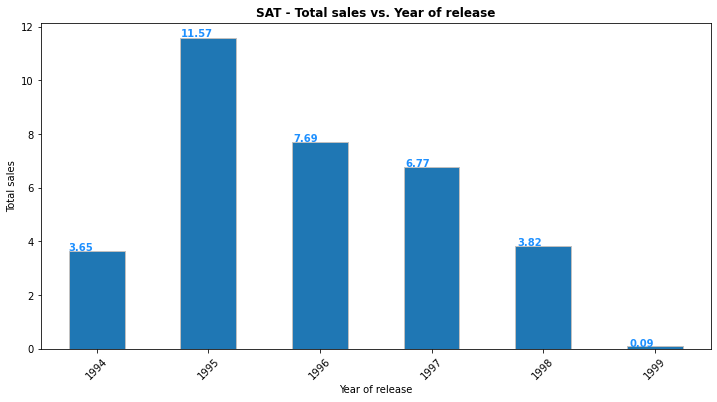

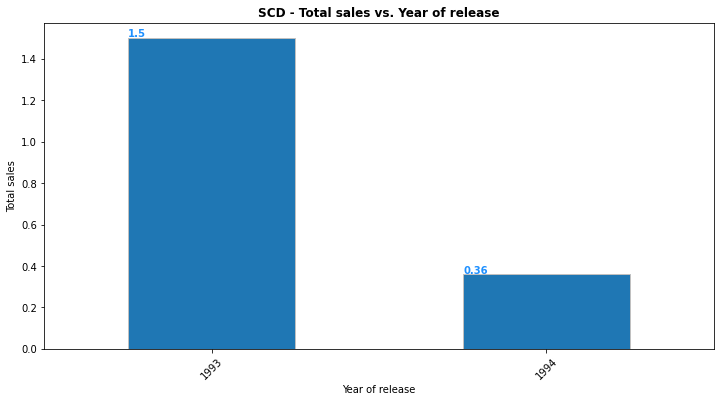

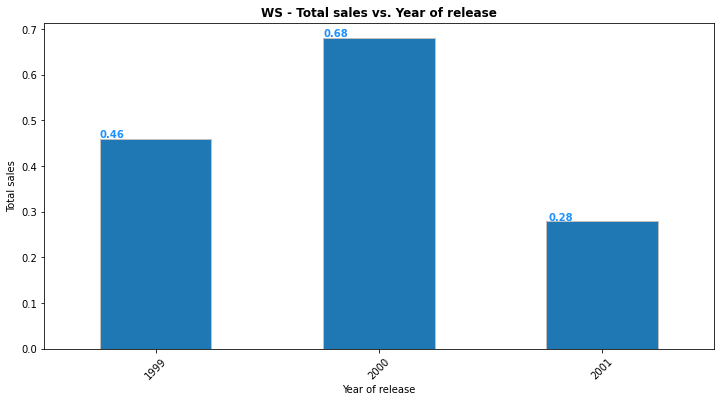

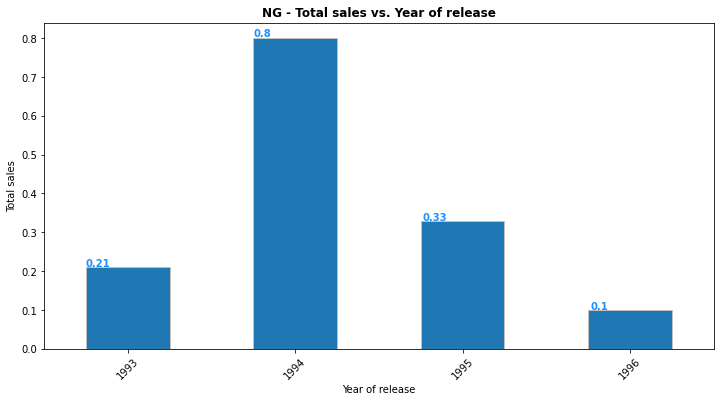

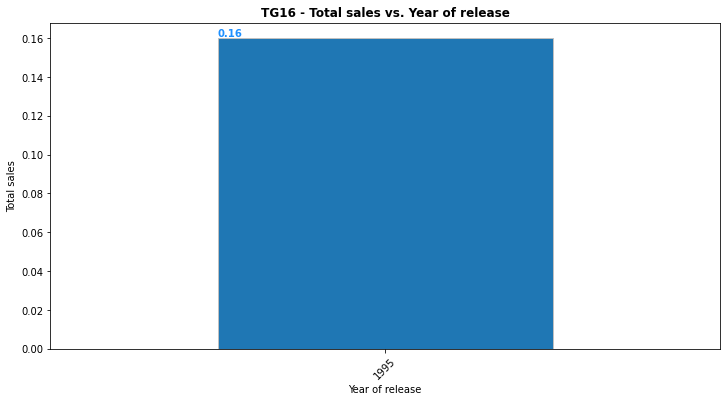

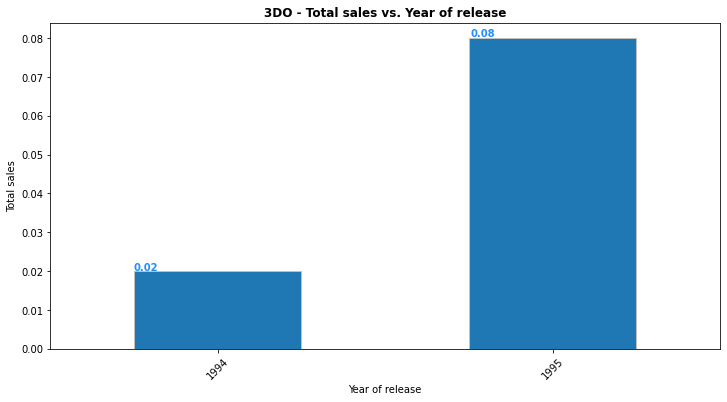

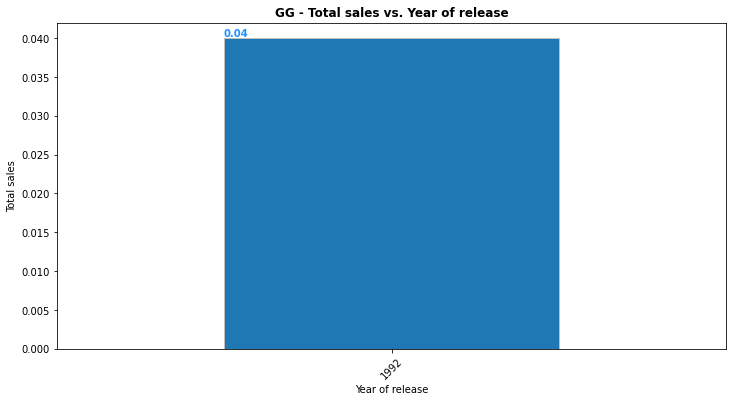

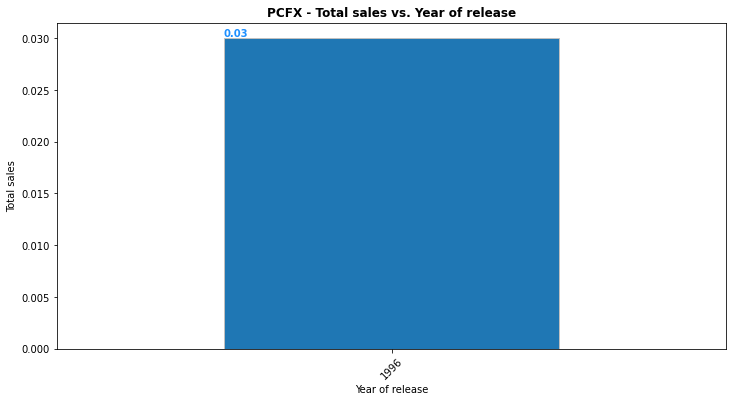

In [52]:
# Distribusi Dari Total Sales Vs Tahun rilis berdasarkan setiap Platform 

for platform in data['platform'].unique():
    plot_distribution(data, 'year_of_release', 'total_sales', 'platform', platform)

Kesimpulan :

Pada Chart Distribusi Total Penjualan Terhadap Tahun Rilis Untuk Setiap Platform Diatas Dapat Disimpulkan :

1. Wii Adalah Console popular pada Tahun 2006 sd 2011. 
2. DS Adalah Console Populer antara tahun 2005 sd 2010.
3. X360 Adalah Console Populer antara tahun 2008 sd 2011.
4. PS2 Adalah Console Populer antara tahun 2001 dan 2007. Penjualan mulai menurun setelah tahun 2007 yang bertepatan dengan munculnya PS3.
5. PS3 Adalah Console Populer antara tahun 2008 sd 2013. dan penjualannya turun pada tahun 2016.
6. NES Adalah Console Populer pada tahun 1984 sd 1988.
7. PSP Populer pada  tahun 2005 sd 2010. 
8. PC Memiliki penjulan game tertinggi pada tahun 2011. PC Merupakan platform dengan umur terpanjang dibanding dengan platform lainnya. PC telah menjual Game selama 30 Tahun. 
9. Biasanya Dibutuhkan Sekitar 6 Tahun untuk muncul platform baru dan platform lama akan memudar.

#### Menemukan Platform yang dulunya populer tetapi sekarang tidak memiliki penjualan apapun

Kita dapat memvisualisasikan platform yang populer tetapi sekarang tidak memiliki penjualan berdasarkan z-score. kita dapat menghitung z-score dan menggunakan pendekatan bersyarat untuk membuat nilai penjualan yang kurang dari 0 dengan warna merah dan lebih dari 0 dengan warna hijau. kita dapat memvisualkannya dengan plot divergen. 

In [53]:
# Mengelompokkan total penjualan berdasarkan platform games

platform_data = data[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
platform_data

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [54]:
# Menghitung statistik distribusi zscore 

platform_data['sales_zscore'] = (platform_data['total_sales'] - platform_data['total_sales'].mean()) / platform_data['total_sales'].std()


In [55]:
# Membuat perbedaan warna dari value penjualan platform

platform_data['color'] = ['red' if x < 0 else 'green' for x in platform_data['sales_zscore']]


In [56]:
# Menampilkan Dataset 

platform_data

,platform,total_sales,sales_zscore,color
0,PCFX,0.03,-0.825614,red
1,GG,0.04,-0.825586,red
2,3DO,0.10,-0.825413,red
3,TG16,0.16,-0.825241,red
4,WS,1.42,-0.821623,red
5,NG,1.44,-0.821565,red
6,SCD,1.86,-0.820359,red
7,DC,15.95,-0.779896,red
8,GEN,28.35,-0.744287,red
9,SAT,33.59,-0.729239,red


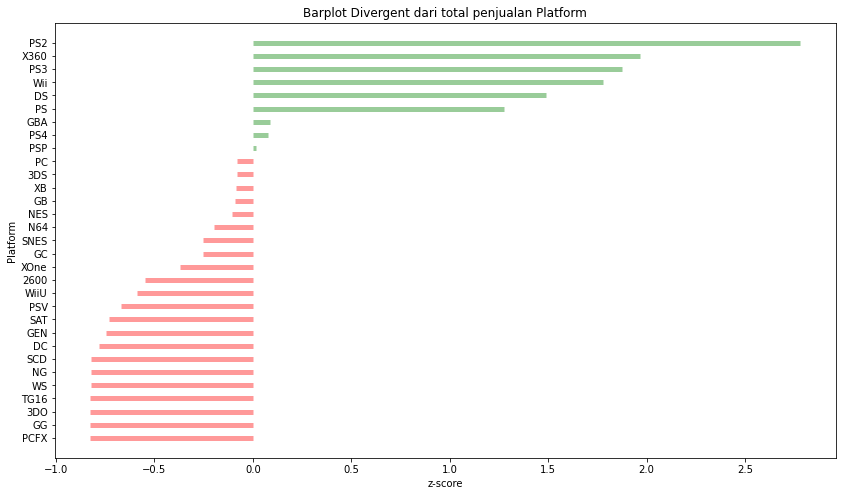

In [57]:
# Menampilkan Barplot Divergent dari nilai z-score total penjualan platform game

plt.figure(figsize=(14, 8))
plt.hlines(y=platform_data.platform, xmin=0, xmax=platform_data.sales_zscore, color=platform_data.color, alpha=0.4, linewidth=5)
plt.xlabel('z-score') 
plt.ylabel('Platform') 

# Menampilkan judul 
plt.title('Barplot Divergent dari total penjualan Platform')
plt.show()

Kesimpulan :

Pada barplot divergen diatas menunjukkan bar denga warna 'hijau adalah total penjualan platform dengan rata-rata terbanyak yakni PS2, x360, PS3, Wii, DS dan PS sedangkan bar dengan warna 'merah' adalah total penjualan dengan rata-rata terendah yakni TG16, 3DO, GG dan PCFX. 

### Menentukan Periode Waktu Pengambilan Data 

In [58]:
# Menentukan Periode Waktu Pengambilan Data

new_data = data[data.year_of_release >= 2013]
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,90,7.9,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,81,4.4,E10+,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,83,5.6,M,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,83,5.6,M,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,33,8.9,E10+,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,83,5.6,M,0.01


Kesimpulan :

Berdasarkan Data Pada Setiap Periode Tahun Game di Rilis disini kita menentukan periode waktu pengambilan data diatas tahun 2001.

### Platform Dengan Penjualan Terbanyak, Platform yang tumbuh lalu menyusut, Platform yang berpotensi menghasilkan keuntungan

In [59]:
# Mengelompokkan platform dan total sale berdasarkan platform

tree_data = new_data[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()

# filter dataset dengan total penjualan diatas 10%
tree_data = tree_data[tree_data['total_sales'] > 10]
tree_data

,platform,total_sales
2,Wii,13.66
3,PSV,32.99
4,PC,39.71
5,WiiU,64.63
6,X360,136.80
7,3DS,143.25
8,XOne,159.32
9,PS3,181.43
10,PS4,314.14


In [60]:
# Membuat label untuk tree map dari total penjualan platform

tree_size = tree_data['total_sales'].values.tolist()
labels = tree_data.apply(lambda x: str(x[0])+'\n'+'$'+ str(round(x[1])), axis=1)
labels


2       Wii\n$14
3       PSV\n$33
4        PC\n$40
5      WiiU\n$65
6     X360\n$137
7      3DS\n$143
8     XOne\n$159
9      PS3\n$181
10     PS4\n$314
dtype: object

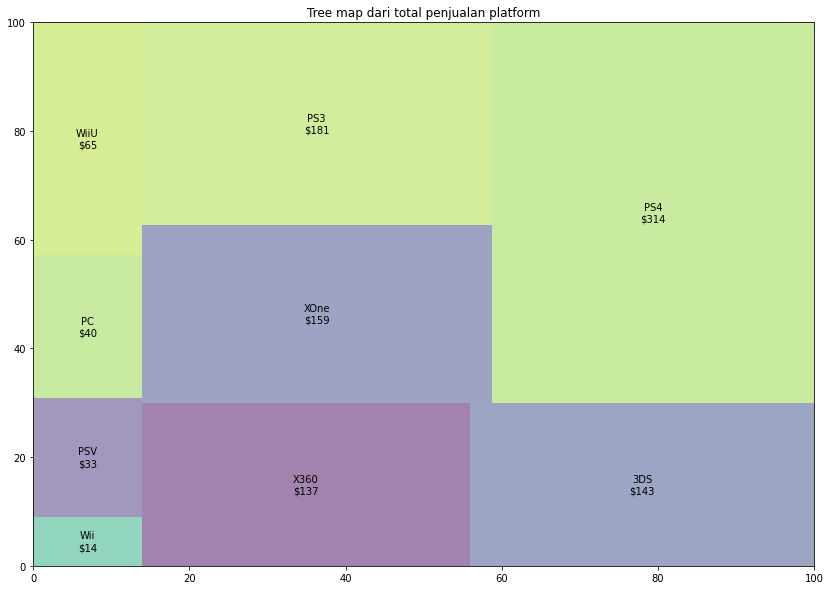

In [61]:
# Tree map dari total penjualan platform 

plt.figure(figsize=(14,10))
plt.title('Tree map dari total penjualan platform')
squarify.plot(sizes=tree_size, label=labels, alpha=0.5);

Kesimpulan : 

Dapat kita lihat pada ukuran dari tree map diatas, semua persegi empat mewakili skala dari penjualan yang tumbuh dan menyusut, total penjualan juga disertakan dalam tree map. ukuran pada seetiap persegi dari penjualan platform menginformasikan penjualan platform mana yang tumbuh atau menyusut. persegi yang lebih besar mewakili platform yang memimpin dalam penjualan, sedangkan persegi yang lebih kecil menggambarkan platform yang menyusut dalam penjualan. pada chart treemap diatas menunjukkan distribusi pasar dalam penjualan platform games dimana PS4, PS3, XOne, 3DS dan X360 adalah platform yang memimpin penjualan dan platform yang memiliki potensi untuk mendapatkan keuntungan . 

### Boxplot Penjualan Global Semua Game yang Dikelompokkan berdasarkan Platform

In [62]:
# Mengelomppokka data untuk total penjualan game dari tahun 2013 keatas

grouped = new_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
grouped

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54
5,PC,2013,12.66
6,PC,2014,13.28
7,PC,2015,8.52
8,PC,2016,5.25
9,PS3,2013,113.25


In [63]:
# Mengelompokkan list berdasarkan platform

ordered = grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
ordered

0       DS
1      PSP
2      Wii
3      PSV
4       PC
5     WiiU
6     X360
7      3DS
8     XOne
9      PS3
10     PS4
Name: platform, dtype: object

#### Signifikan Penjualan global dari platform

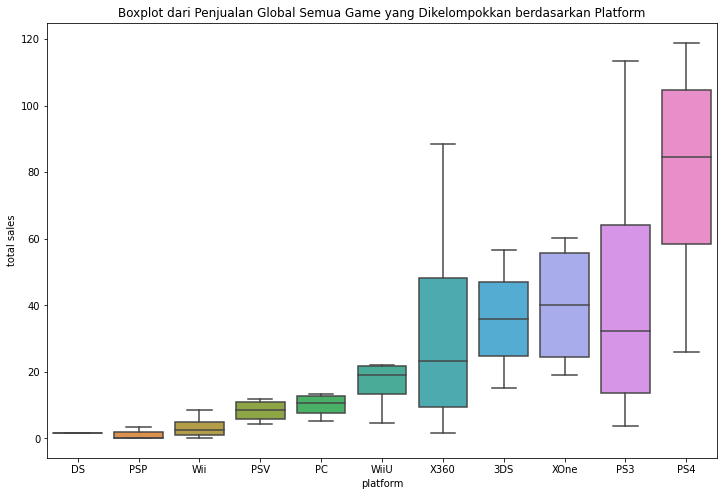

In [64]:
# Boxplot dari Penjualan Global Semua Game yang Dikelompokkan berdasarkan Platform

plt.figure(figsize=(12,8))
sns.boxplot(x='platform', y='total_sales', data=grouped, order=ordered)
plt.title('Boxplot dari Penjualan Global Semua Game yang Dikelompokkan berdasarkan Platform')
plt.xlabel('platform')
plt.ylabel('total sales')
plt.show()

Kesimpulan :

Pada Boxplot diatas dapat dilihat bahwa platform PS4 memiliki rata-rata penjualan lebih tinggi dari tahun ke tahun dibandingkan dengan platform lainnya. dapat diamati bahwa perbedaan pada penjualan setiap platform sangat signifikan.dapat disimpulka bahwa PS4 memiliki penjualan lebih banyak daripada platform lainnya. kita juga dapat membuat boxplot yang dapat melihat rata-rata penjualan di seluruh platform.

In [65]:
# Mencari rata-rata dari Penjualan Global Semua Game yang Dikelompokkan berdasarkan Platform

new_data_mean = new_data.groupby(['platform', 'year_of_release'])['total_sales'].agg('mean').reset_index()
new_data_mean

,platform,year_of_release,total_sales
0,3DS,2013,0.621648
1,3DS,2014,0.547000
2,3DS,2015,0.323023
3,3DS,2016,0.329130
4,DS,2013,0.192500
5,PC,2013,0.316500
6,PC,2014,0.282553
7,PC,2015,0.170400
8,PC,2016,0.097222
9,PS3,2013,0.898810


In [66]:
# Mengelompokkan list berdasarkan platform

ordered_mean = new_data_mean.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
ordered_mean

0      PSP
1       DS
2      PSV
3       PC
4      PS3
5      Wii
6      3DS
7     WiiU
8     X360
9     XOne
10     PS4
Name: platform, dtype: object

#### Rata-Rata Dari Penjualan Global Pada Platform

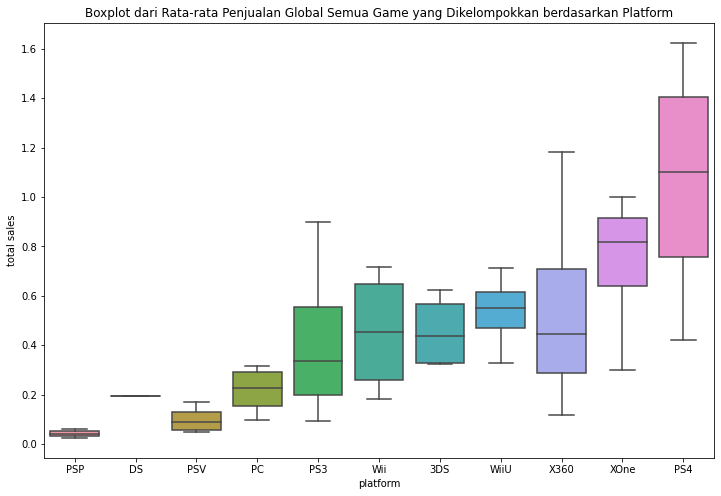

In [67]:
# Boxplot dari Rata-rata Penjualan Global Semua Game yang Dikelompokkan berdasarkan Platform

plt.figure(figsize=(12,8))
sns.boxplot(x='platform', y='total_sales', data=new_data_mean, order=ordered_mean )
plt.title('Boxplot dari Rata-rata Penjualan Global Semua Game yang Dikelompokkan berdasarkan Platform')
plt.xlabel('platform')
plt.ylabel('total sales')
plt.show()

Kesimpulan : 

Dari boxplot rata-rata penjualan di berbagai platform, dapat dilihat bahwa PS4 memiliki rata-rata penjualan tertinggi dari platform lainnya, dan PS4 juga merupakan platform yang paling menguntungkan karena lebih banyak terjual.

### Ulasan  Pengguna dan para Profesional dalam mempengaruhi penjualan pada salah satu platform Populer. 

Fungsi Untuk mempermudah analisis :

In [68]:
# Fungsi Menentukan Korelasi

def platform_corr(data, platform):
    data_platform = data[data.platform == platform].reset_index()[['user_score', 'critic_score', 'total_sales']]
    return data_platform.corr()

In [69]:
# Fungsi menampilkan plot correlation matrix

def corrMatrix(data, platform):
    data_platform = data[data.platform == platform].reset_index()[['user_score', 'critic_score', 'total_sales']]
    plt.figure(figsize=(8, 6))
    corrMatrix = data_platform.corr()
    sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
    plt.title('Plot Correlation Matris ' + str(platform) + ' platform')
    plt.show();

In [70]:
# Fungsi untuk menghitung korelasi pearson 

def pearson_coeff(data, x, y, platform):
    data_platform = data[data.platform == platform].reset_index()[['user_score', 'critic_score', 'total_sales']]
    pearson_coef, p_value = st.pearsonr(data_platform[x], data_platform[y])
    print("Hasil Korelasi Koefisin Pearson adalah {:.3f}".format(pearson_coef), "Dengan nilai p-value {:.3f}" .format(p_value))
    print()
    print("\033[1m" + 'Conclusion:' + "\033[0m")
    if (p_value < 0.001) and (pearson_coef < 0.5):
        print("Karena p-value adalah < 0.001, terdapat bukti kuat bahwa korelasi antara " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " signifikan secara statistika, meskipun hubungan antar variable tidak terlalu kuat ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.001) and (pearson_coef < 0.7):
        print("Karena p-value adalah < 0.001, terdapat bukti kuat bahwa korelasi antara " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " signifikan secara statistika, meskipun hubungan antar variable cukup kuat ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.001) and (pearson_coef > 0.7):
        print("Karena p-value adalah < 0.001, terdapat bukti kuat bahwa korelasi antara " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " signifikan secara statistika, meskipun hubungan antar variable sangat kuat ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")") 
    elif (p_value < 0.05) and (pearson_coef < 0.5):
        print("Karena p-value adalah < 0.05,  terdapat bukti sedang bahwa korelasi antara " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " signifikan secara statistika,  meskipun hubungan antar variable tidak terlalu kuat ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.05) and (pearson_coef < 0.7):
        print("Karena p-value adalah < 0.05, terdapat bukti sedang bahwa korelasi antara " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " signifikan secara statistika, meskipun hubungan antar variable cukup kuat ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.05) and (pearson_coef > 0.7):
        print("Karena p-value adalah < 0.05, terdapat bukti sedang bahwa korelasi antara " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " signifikan secara statistika, meskipun hubungan antar variable sangat kuat ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef < 0.5):
        print("Karena p-value adalah < 0.1, terdapat bukti lemah bahwa korelasi antara " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " signifikan secara statistika, meskipun hubungan antar variable tidak terlalu kuat ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef < 0.7):
        print("Karena p-value adalah < 0.1, terdapat bukti lemah bahwa korelasi antara " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " signifikan secara statistika, meskipun hubungan antar variable cukup kuat ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef > 0.7):
        print("Karena p-value adalah < 0.1, terdapat bukti lemah bahwa korelasi antara " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " signifikan secara statistika, meskipun hubungan antar variable sangat kuat ("+"\u2248"+"{:.3f}".format(abs(pearson_coef))+")")    
    elif (p_value > 0.1):
        print("Karena p-value adalah > 0.1, tidak terdapat bukti korelasi antara " + str(x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " signifikan secara statistika")

In [71]:
# Fungsi membuat scatter plot 

def plot_sns_scatter(data, x, y, platform):
    data_platform = data[data.platform == platform].reset_index()[[x, y]]
    plt.figure(figsize=(8,6))
    sns.regplot(x=x, y=y, data=data_platform)
    plt.title('scatter plot korelasi antara ' + str(x.replace('_', ' ').capitalize()) + \
              ' and ' + str(y.replace('_', '').capitalize()) + ' for ' + str(platform))
    plt.xlabel(str(x.replace('_', ' ').capitalize()))
    plt.ylabel(str(y.replace('_', ' ').capitalize()))
    plt.show();
    

Pada tahap ini, kita akan melihat bagaimana pengaruh Pengguna dan para Professional dalam mempengaruhi platform dari PS4, PS3, XOne, 3DS dan X360. Pertama kita akan melihat Korelasi PS4 dengan critic score, user score dan total sales.

#### PS4 Platform 

In [72]:
# Korelasi PS4 terhadap Pengguna, para Professional terhadap penjualan 

platform_corr(new_data, 'PS4')

,user_score,critic_score,total_sales
user_score,1.000000,0.631067,-0.078504
critic_score,0.631067,1.000000,0.159895
total_sales,-0.078504,0.159895,1.000000


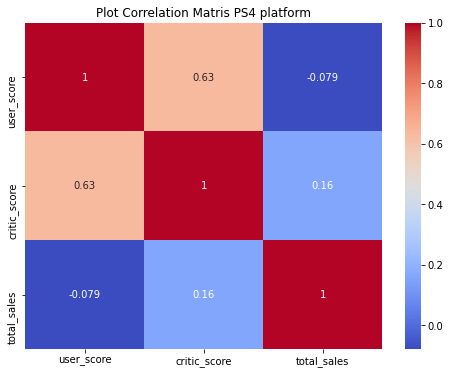

In [73]:
# Plot dari matrix korelasi

corrMatrix(new_data, 'PS4')

In [74]:
# Fungsi Menghitung korelasi pearson antara pengguna terhadap total penjualan 

pearson_coeff(new_data, 'user_score', 'total_sales', 'PS4')

Hasil Korelasi Koefisin Pearson adalah -0.079 Dengan nilai p-value 0.121

Conclusion:
Karena p-value adalah > 0.1, tidak terdapat bukti korelasi antara User score and Total sales signifikan secara statistika


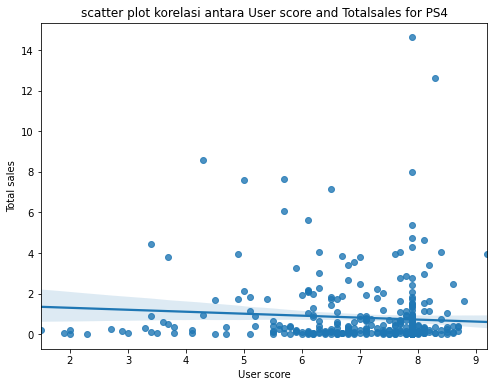

In [75]:
# Membuat scatter plot untuk melihat korelasi antara pengguna terhadap penjualan

plot_sns_scatter(new_data, 'user_score', 'total_sales', 'PS4') 


Dapat dilihat pada scatter plot penggunga terhadap total penjualan, dimana titik data miring ke sebelah kanan, ini dapat diasumsikan bahwa korelasi pada dua variable lemah.

In [76]:
# Fungsi Menghitung korelasi pearson antara critic score terhadap total penjualan 

pearson_coeff(new_data, 'critic_score', 'total_sales', 'PS4')

Hasil Korelasi Koefisin Pearson adalah 0.160 Dengan nilai p-value 0.001

Conclusion:
Karena p-value adalah < 0.05,  terdapat bukti sedang bahwa korelasi antara Critic score and Total sales signifikan secara statistika,  meskipun hubungan antar variable tidak terlalu kuat (≈0.160)


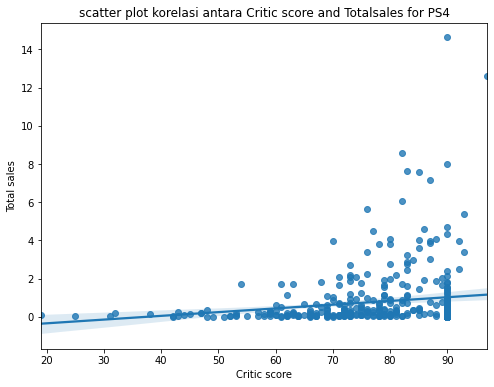

In [77]:
# Membuat scatter plot untuk melihat korelasi antara critic score terhadap penjualan

plot_sns_scatter(new_data, 'critic_score', 'total_sales', 'PS4') 


Dapat dilihat pada scatter plot critic score terhadap total penjualan, dimana titik data miring ke sebelah kiri, ini dapat diasumsikan bahwa korelasi pada dua variable ini kuat.

#### PS3 Platform 

In [78]:
# Korelasi PS3 terhadap Pengguna, para Professional terhadap penjualan 

platform_corr(new_data, 'PS3')

,user_score,critic_score,total_sales
user_score,1.000000,-0.188805,-0.149824
critic_score,-0.188805,1.000000,0.321503
total_sales,-0.149824,0.321503,1.000000


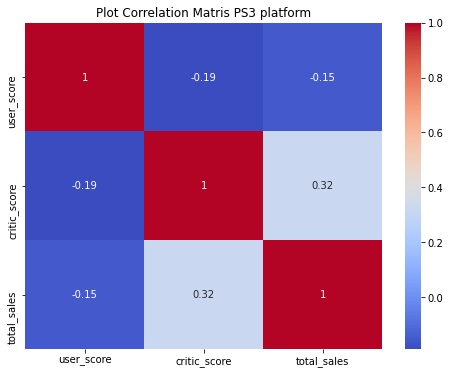

In [79]:
# Plot dari matrix korelasi

corrMatrix(new_data, 'PS3')

In [80]:
# Fungsi Menghitung korelasi pearson antara pengguna terhadap total penjualan 

pearson_coeff(new_data, 'user_score', 'total_sales', 'PS3')

Hasil Korelasi Koefisin Pearson adalah -0.150 Dengan nilai p-value 0.005

Conclusion:
Karena p-value adalah < 0.05,  terdapat bukti sedang bahwa korelasi antara User score and Total sales signifikan secara statistika,  meskipun hubungan antar variable tidak terlalu kuat (≈0.150)


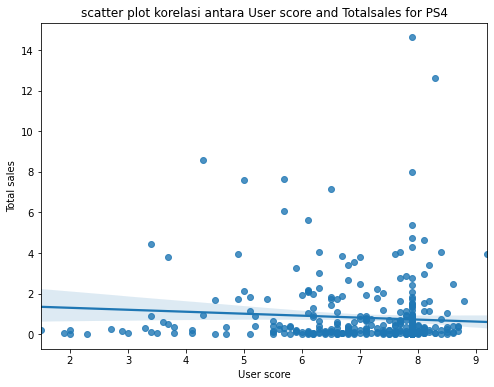

In [81]:
# Membuat scatter plot untuk melihat korelasi antara pengguna terhadap penjualan

plot_sns_scatter(new_data, 'user_score', 'total_sales', 'PS4') 

Dapat dilihat pada scatter plot penggunga terhadap total penjualan, dimana titik data miring ke sebelah kanan, ini dapat diasumsikan bahwa korelasi pada dua variable lemah.

In [82]:
# Fungsi Menghitung korelasi pearson antara critic score terhadap total penjualan 

pearson_coeff(new_data, 'critic_score', 'total_sales', 'PS3')

Hasil Korelasi Koefisin Pearson adalah 0.322 Dengan nilai p-value 0.000

Conclusion:
Karena p-value adalah < 0.001, terdapat bukti kuat bahwa korelasi antara Critic score and Total sales signifikan secara statistika, meskipun hubungan antar variable tidak terlalu kuat (≈0.322)


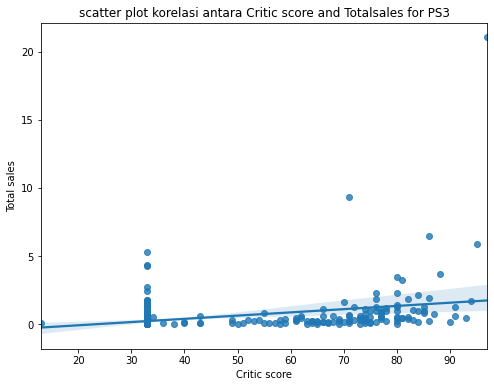

In [83]:
# Membuat scatter plot untuk melihat korelasi antara critic score terhadap penjualan

plot_sns_scatter(new_data, 'critic_score', 'total_sales', 'PS3') 


Dapat dilihat pada scatter plot critic score terhadap total penjualan, dimana titik data miring ke sebelah kiri, ini dapat diasumsikan bahwa korelasi pada dua variable ini kuat.

#### XOne Platform 

In [84]:
# Korelasi XOne terhadap Pengguna, para Professional terhadap penjualan 

platform_corr(new_data, 'XOne')

,user_score,critic_score,total_sales
user_score,1.000000,0.575233,0.027808
critic_score,0.575233,1.000000,0.379298
total_sales,0.027808,0.379298,1.000000


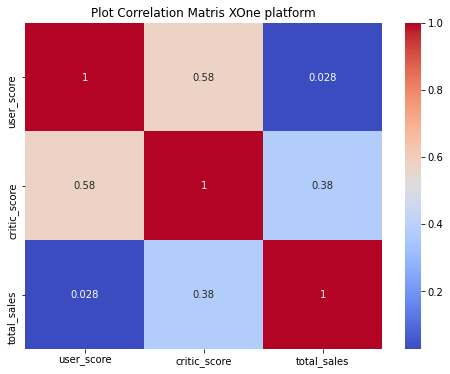

In [85]:
# Plot dari matrix korelasi

corrMatrix(new_data, 'XOne')

In [86]:
# Fungsi Menghitung korelasi pearson antara pengguna terhadap total penjualan 

pearson_coeff(new_data, 'user_score', 'total_sales', 'XOne')

Hasil Korelasi Koefisin Pearson adalah 0.028 Dengan nilai p-value 0.664

Conclusion:
Karena p-value adalah > 0.1, tidak terdapat bukti korelasi antara User score and Total sales signifikan secara statistika


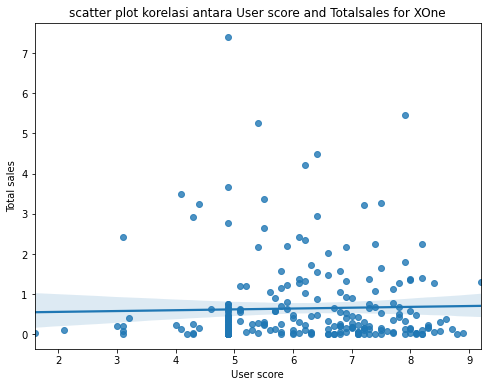

In [87]:
# Membuat scatter plot untuk melihat korelasi antara critic score terhadap penjualan

plot_sns_scatter(new_data, 'user_score', 'total_sales', 'XOne') 


Dapat dilihat pada scatter plot penggunga terhadap total penjualan, dimana titik data miring ke sebelah kanan, ini dapat diasumsikan bahwa korelasi pada dua variable lemah.

In [88]:
# Fungsi Menghitung korelasi pearson antara critic score terhadap total penjualan 

pearson_coeff(new_data, 'critic_score', 'total_sales', 'XOne')

Hasil Korelasi Koefisin Pearson adalah 0.379 Dengan nilai p-value 0.000

Conclusion:
Karena p-value adalah < 0.001, terdapat bukti kuat bahwa korelasi antara Critic score and Total sales signifikan secara statistika, meskipun hubungan antar variable tidak terlalu kuat (≈0.379)


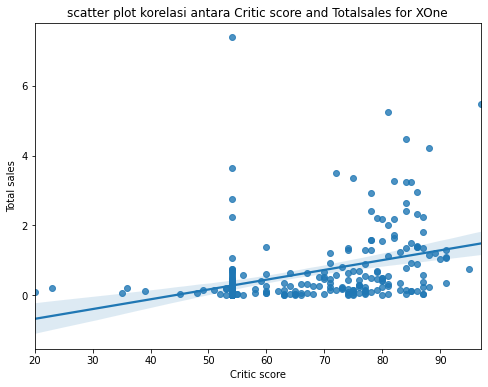

In [89]:
# Membuat scatter plot untuk melihat korelasi antara critic score terhadap penjualan

plot_sns_scatter(new_data, 'critic_score', 'total_sales', 'XOne') 


Dapat dilihat pada scatter plot critic score terhadap total penjualan, dimana titik data miring ke sebelah kiri, ini dapat diasumsikan bahwa terdapat korelasi pada dua variable ini walaupun tidak terlalu kuat.

#### 3DS Platform 

In [90]:
# Korelasi 3DS terhadap Pengguna, para Professional terhadap penjualan 

platform_corr(new_data, '3DS')

,user_score,critic_score,total_sales
user_score,1.000000,-0.213736,0.067776
critic_score,-0.213736,1.000000,0.060622
total_sales,0.067776,0.060622,1.000000


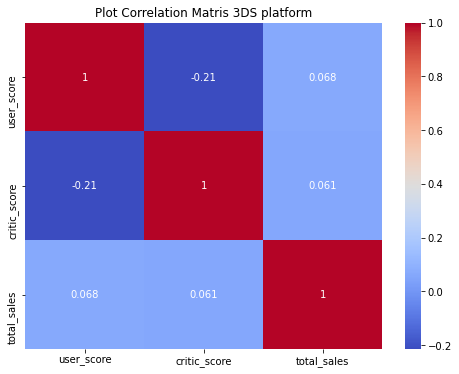

In [91]:
# Plot dari matrix korelasi

corrMatrix(new_data, '3DS')

In [92]:
# Fungsi Menghitung korelasi pearson antara pengguna terhadap total penjualan 

pearson_coeff(new_data, 'user_score', 'total_sales', '3DS')

Hasil Korelasi Koefisin Pearson adalah 0.068 Dengan nilai p-value 0.239

Conclusion:
Karena p-value adalah > 0.1, tidak terdapat bukti korelasi antara User score and Total sales signifikan secara statistika


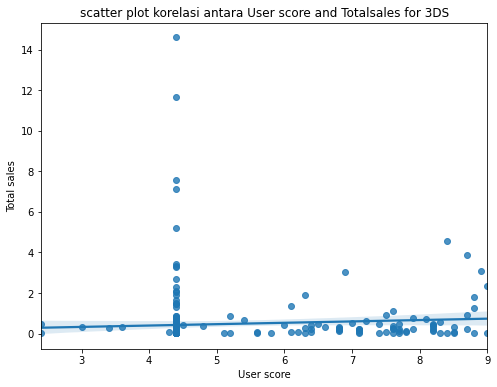

In [93]:
# Membuat scatter plot untuk melihat korelasi antara critic score terhadap penjualan

plot_sns_scatter(new_data, 'user_score', 'total_sales', '3DS') 


Dapat dilihat pada scatter plot penggunga terhadap total penjualan, dimana titik data hampir sejajar, ini dapat diasumsikan bahwa tidak ada korelasi terhadap dua variable ini.

In [94]:
# Fungsi Menghitung korelasi pearson antara critic score terhadap total penjualan 

pearson_coeff(new_data, 'critic_score', 'total_sales', '3DS')

Hasil Korelasi Koefisin Pearson adalah 0.061 Dengan nilai p-value 0.293

Conclusion:
Karena p-value adalah > 0.1, tidak terdapat bukti korelasi antara Critic score and Total sales signifikan secara statistika


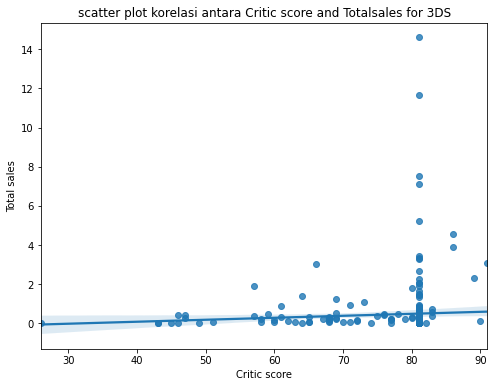

In [95]:
# Membuat scatter plot untuk melihat korelasi antara critic score terhadap penjualan

plot_sns_scatter(new_data, 'critic_score', 'total_sales', '3DS') 


Dapat dilihat pada scatter plot critic score terhadap total penjualan, dimana titik data miring ke sebelah kiri, ini dapat diasumsikan bahwa terdapat korelasi pada dua variable ini walaupun tidak terlalu kuat.

#### X360 Platform 

In [96]:
# Korelasi 3DS terhadap Pengguna, para Professional terhadap penjualan 

platform_corr(new_data, 'X360')

,user_score,critic_score,total_sales
user_score,1.000000,0.516751,0.063406
critic_score,0.516751,1.000000,0.322678
total_sales,0.063406,0.322678,1.000000


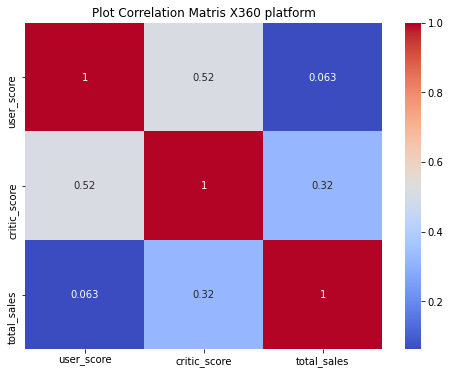

In [97]:
# Plot dari matrix korelasi

corrMatrix(new_data, 'X360')

In [98]:
# Fungsi Menghitung korelasi pearson antara pengguna terhadap total penjualan 

pearson_coeff(new_data, 'user_score', 'total_sales', 'X360')

Hasil Korelasi Koefisin Pearson adalah 0.063 Dengan nilai p-value 0.390

Conclusion:
Karena p-value adalah > 0.1, tidak terdapat bukti korelasi antara User score and Total sales signifikan secara statistika


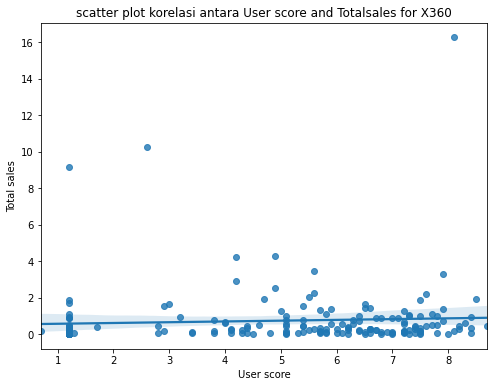

In [99]:
# Membuat scatter plot untuk melihat korelasi antara critic score terhadap penjualan

plot_sns_scatter(new_data, 'user_score', 'total_sales', 'X360') 


Dapat dilihat pada scatter plot penggunga terhadap total penjualan, dimana titik data hampir sejajar, ini dapat diasumsikan bahwa tidak ada korelasi terhadap dua variable ini.

In [100]:
# Fungsi Menghitung korelasi pearson antara pengguna terhadap total penjualan 

pearson_coeff(new_data, 'critic_score', 'total_sales', 'X360')

Hasil Korelasi Koefisin Pearson adalah 0.323 Dengan nilai p-value 0.000

Conclusion:
Karena p-value adalah < 0.001, terdapat bukti kuat bahwa korelasi antara Critic score and Total sales signifikan secara statistika, meskipun hubungan antar variable tidak terlalu kuat (≈0.323)


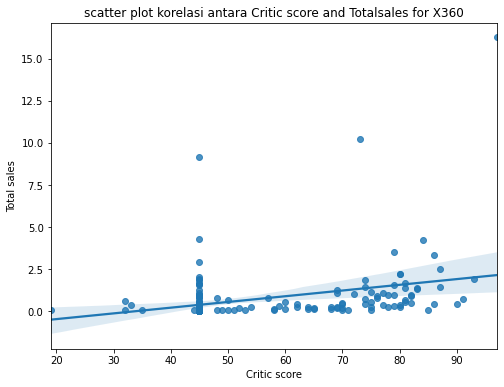

In [101]:
# Membuat scatter plot untuk melihat korelasi antara critic score terhadap penjualan

plot_sns_scatter(new_data, 'critic_score', 'total_sales', 'X360') 

Dapat dilihat pada scatter plot penggunga terhadap total penjualan, dimana titik data hampir sejajar, ini dapat diasumsikan bahwa tidak ada korelasi terhadap dua variable ini.

#### Kesimpulan :

Setelah menghitung p-value pada platform 3DS dan X360 tidak terdapat korelasi yang signifikan antara Ulasan Pengguna dan para Profesional terhadapa total penjualan. Lalu Platform (PS4, PS3 dan XOne) terdapat korelasi antara Ulasan Pengguna dan para Profesional terhadap total penjualan, dapat di simpulkan bahwa ulasa pengguna dan professional mempengaruhi total penjualan pada platform PS4, PS3 dan XOne.

### Distribusi umum game berdasarkan genre

In [102]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 16 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2236 non-null   object 
 1   platform         2236 non-null   object 
 2   year_of_release  2236 non-null   int64  
 3   genre            2236 non-null   object 
 4   na_sales         2236 non-null   float64
 5   eu_sales         2236 non-null   float64
 6   jp_sales         2236 non-null   float64
 7   other_sales      2236 non-null   float64
 8   critic_score     2236 non-null   int64  
 9   user_score       2236 non-null   float64
 10  rating           2236 non-null   object 
 11  total_sales      2236 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 227.1+ KB


In [103]:
# Mengelompokkan genre terhadap total sales 

genre_grouped = new_data.groupby(['genre', 'year_of_release'])['total_sales'].sum().reset_index()
genre_grouped

,genre,year_of_release,total_sales
0,Action,2013,122.79
1,Action,2014,97.23
2,Action,2015,72.02
3,Action,2016,30.11
4,Adventure,2013,6.09
5,Adventure,2014,5.57
6,Adventure,2015,8.16
7,Adventure,2016,3.82
8,Fighting,2013,7.09
9,Fighting,2014,15.85


In [104]:
# Mengelompokkan list genre berdasarkan total sales

ordered_genre = genre_grouped.groupby(['genre'])['total_sales'].sum().sort_values().reset_index()['genre']
ordered_genre

0           Puzzle
1         Strategy
2       Simulation
3        Adventure
4         Fighting
5           Racing
6         Platform
7             Misc
8     Role-Playing
9           Sports
10         Shooter
11          Action
Name: genre, dtype: object

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

In [105]:
# Distribusi Statistik Genre terhadap total_sales

genre_grouped.describe()

,year_of_release,total_sales
count,48.000000,48.000000
mean,2014.500000,22.733542
std,1.129865,27.282646
min,2013.000000,0.010000
25%,2013.750000,4.307500
50%,2014.500000,8.720000
75%,2015.250000,37.785000
max,2016.000000,122.790000


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

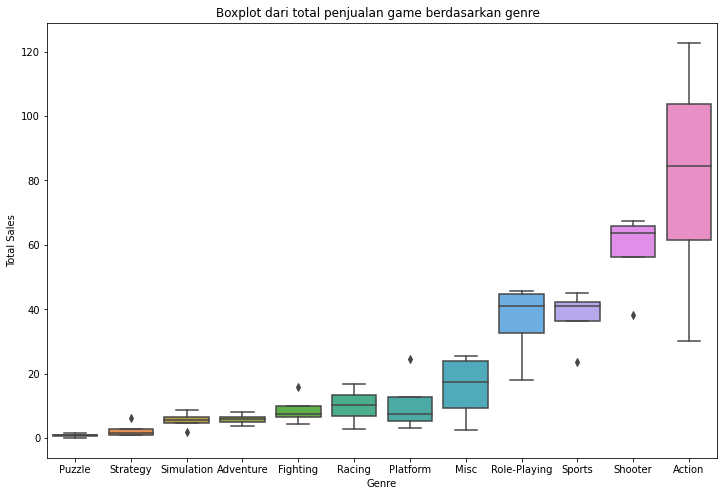

In [106]:
# Boxplot dari total penjualan game berdasarkan genre
plt.figure(figsize=(12,8))
sns.boxplot(x='genre', y='total_sales', data=genre_grouped, order=ordered_genre)
plt.title('Boxplot dari total penjualan game berdasarkan genre  ')
plt.xlabel('Genre')
plt.ylabel('Total Sales');

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

Dari boxplot diatas dapat dilihat bahwa genre yang paling menguntungkan adalah genre Action, Sport, dan Shooter. dan genre yang paling rendah keuntungannya adalah strategy dan puzzle. untuk melakukan generalisasi mengenai genre kita menghitung rata-rata dari total penjualan terhadap genre

#### Melakukan generalisasi terkait genre dengan menggunakan rata-rata total penjualan

In [107]:
# Mengelompokkan rata-rata genre terhadap total sales 

mean_grouped_genre = new_data.groupby(['genre', 'year_of_release'])['total_sales'].agg('mean').reset_index()
mean_grouped_genre

,genre,year_of_release,total_sales
0,Action,2013,0.824094
1,Action,2014,0.517181
2,Action,2015,0.284664
3,Action,2016,0.169157
4,Adventure,2013,0.101500
5,Adventure,2014,0.074267
6,Adventure,2015,0.151111
7,Adventure,2016,0.068214
8,Fighting,2013,0.354500
9,Fighting,2014,0.689130


In [108]:
# Mengelompokkan list genre berdasarkan total sales

ordered_genre_mean = mean_grouped_genre.groupby(['genre'])['total_sales'].sum().sort_values().reset_index()['genre']
ordered_genre_mean

0        Adventure
1         Strategy
2           Puzzle
3       Simulation
4             Misc
5         Fighting
6           Action
7           Racing
8     Role-Playing
9         Platform
10          Sports
11         Shooter
Name: genre, dtype: object

In [109]:
# Distribusi Statistik Genre terhadap total_sales

mean_grouped_genre.describe()

,year_of_release,total_sales
count,48.000000,48.000000
mean,2014.500000,0.466309
std,1.129865,0.372862
min,2013.000000,0.010000
25%,2013.750000,0.164646
50%,2014.500000,0.412833
75%,2015.250000,0.639959
max,2016.000000,1.985588


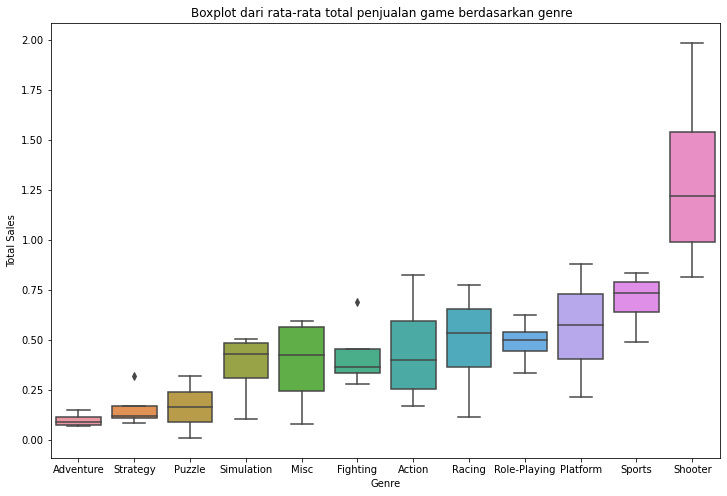

In [110]:
# Boxplot dari rata-rata total penjualan game berdasarkan genre
plt.figure(figsize=(12,8))
sns.boxplot(x='genre', y='total_sales', data=mean_grouped_genre, order=ordered_genre_mean)
plt.title('Boxplot dari rata-rata total penjualan game berdasarkan genre  ')
plt.xlabel('Genre')
plt.ylabel('Total Sales');

Dapat dilihat pada boxplot rata-rata total penjualan berdasarkan game pada seluruh genre. dapat disimpulkan bahwa penjualan dari game dengan genre petualangan dan strategy yang paling tidak menguntungkan. lalu untuk game dengan total penjualan yang menguntungkan adaah shooter, sport. 

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

#### Kesimpulan :

Setelah menganalisa, berapa banyak game yang dirilis pada tahun yang berbeda bahwa lebih banyak game dirilis pada tahun 2001 hingga 2016. Sebagian besar game dirilis antara tahun 2005 dan 2011. Tahun dengan jumlah game tertinggi yang dirilis adalah tahun 2008. Dari analisis bahwa periode 2000 hingga 2016 signifikan dengan tahun antara 2007 dan 2010 memiliki signifikansi paling besar dalam data. Analisis variasi penjualan di seluruh platform menunjukkan bahwa lima platform teratas dalam hal total penjualan masing-masing adalah PS4, PS3, XOne, 3DS dan X360. Platform dengan penjualan paling sedikit adalah PCFX, GG, 3DO, TG16, dan WS. kita juga membuktikan bahwa PC memiliki penjualan tertinggi pada tahun 2011. PC adalah platform dengan umur terpanjang di antara penjualan platform lainnya selama sekitar 30 tahun. Biasanya dibutuhkan sekitar 6 tahun untuk platform baru muncul dan yang lama memudar.

Kami menetapkan bahwa PS4, PS3, XOne, 3DS, dan X360 adalah platform yang memimpin dalam penjualan. Ini menjadikan mereka platform yang paling menguntungkan. PCFX, GG, 3DO, TG16, dan WS adalah platform terburuk dalam hal total penjualan dengan nilai jauh di bawah rata-rata data. dapat  dilihat bagaimana ulasan pengguna dan profesional memengaruhi penjualan untuk satu platform populer dari tahun 2013. Kami menyimpulkan setelah menghitung nilai-p dan menganalisis statistik bahwa ada hubungan linier yang signifikan antara ulasan pengguna dan profesional dan Total penjualan untuk produk teratas. Oleh karena itu, review pengguna mempengaruhi total penjualan.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

##  Melakukan pemprofilan pengguna untuk masing-masing wilayah

Untuk setiap wilayah (NA, EU, JP), tentukan:
1. 5 platform teratas. Jelaskan variasi pangsa pasar dari satu wilayah ke wilayah lainnya.
1. 5 genre teratas. Jelaskan perbedaannya.
1. Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

### Menentukan Penjulan berdasarkan Platform di setiap wilayah

#### Mengelompokkan Penjualan pada wilayah NA

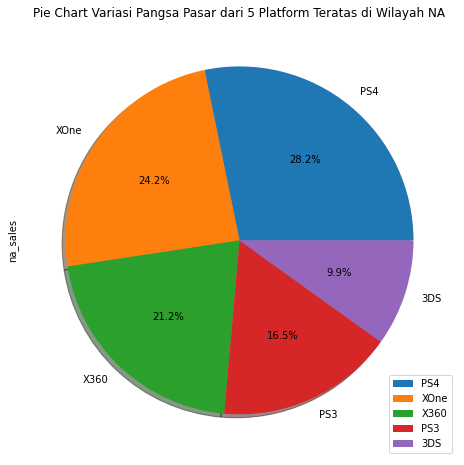

In [111]:
# Mengelompokkan Wilayah NA 

new_data_region = new_data.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
top_5_platforms = new_data_region.head()
(top_5_platforms.set_index('platform')
                .plot(y='na_sales', kind='pie',
                     title= 'Pie Chart Variasi Pangsa Pasar dari 5 Platform Teratas di Wilayah NA',
                     figsize=(8,8), autopct='%1.1f%%', shadow=True)

);


#### Mengelompokkan Penjualan pada wilayah EU

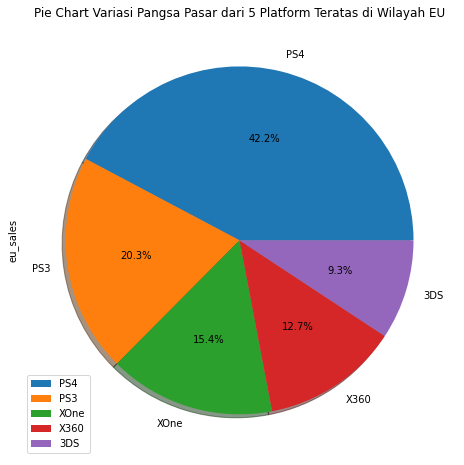

In [112]:
new_data_region = new_data.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
top_5_platforms = new_data_region.head()
(top_5_platforms.set_index('platform')
                .plot(y='eu_sales', kind='pie',
                     title= 'Pie Chart Variasi Pangsa Pasar dari 5 Platform Teratas di Wilayah EU',
                     figsize=(8,8), autopct='%1.1f%%', shadow=True)

);

#### Mengelompokkan Penjualan pada wilayah JP

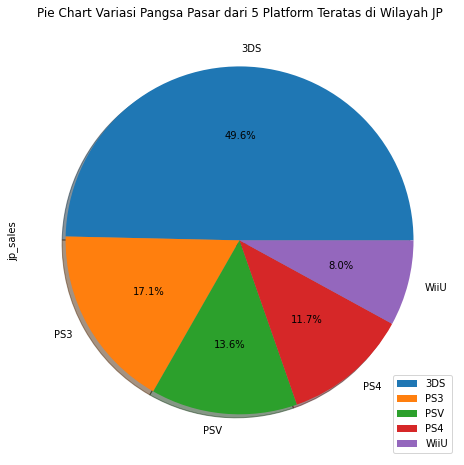

In [113]:
new_data_region = new_data.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
top_5_platforms = new_data_region.head()
(top_5_platforms.set_index('platform')
                .plot(y='jp_sales', kind='pie',
                     title= 'Pie Chart Variasi Pangsa Pasar dari 5 Platform Teratas di Wilayah JP',
                     figsize=(8,8), autopct='%1.1f%%', shadow=True)

);

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

### Menentukan Penjualan Berdasarkan Genre disetiap Wilayah

#### Mengelompokkan Penjualan Berdasarkan Genre di Wilayah NA

In [114]:
# mengelompokkan penjualan berdasarkan genre di wilayah NA
new_data_genre = new_data.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by= 'na_sales', ascending = False )
top_5_genre_na = new_data_genre
top_5_genre_na.reset_index(drop=True)

,genre,na_sales
0,Action,126.07
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,Platform,18.14
6,Fighting,15.55
7,Racing,12.96
8,Adventure,7.14
9,Simulation,4.86


#### Mengelompokkan Penjualan Berdasarkan Genre di Wilayah EU

In [115]:
# mengelompokkan penjualan berdasarkan genre di wilayah NA
new_data_genre = new_data.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by= 'eu_sales', ascending = False )
top_5_genre_eu = new_data_genre
top_5_genre_eu.reset_index(drop=True)

,genre,eu_sales
0,Action,118.36
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
5,Misc,20.04
6,Platform,15.58
7,Simulation,10.92
8,Fighting,8.55
9,Adventure,8.25


#### Mengelompokkan Penjualan Berdasarkan Genre di Wilayah JP

In [116]:
# mengelompokkan penjualan berdasarkan genre di wilayah NA
new_data_genre = new_data.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by= 'jp_sales', ascending = False )
top_5_genre_jp = new_data_genre
top_5_genre_jp.reset_index(drop=True)

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.44
3,Fighting,7.65
4,Shooter,6.61
5,Adventure,5.82
6,Sports,5.41
7,Platform,4.79
8,Simulation,4.52
9,Racing,2.30


Kesimpulan :

Penjualan genre games pada wilayah NA dan EU hampir mirip dimana genre action, shooter, sport mendominasi penjualan, dan pada wilayah JP penjualan yang mendominasi adalah role-playing, action dan misc. 

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

### Apakah rating ESRB ( Entertainment Software Rating Board ) memengaruhi penjualan di masing-masing wilayah?

#### Mengelompokkan Penjualan Berdasarkan rating di Wilayah NA

In [117]:
# Mengelompokkan ESRB rating pada wilayah  NA
new_data_rating_na = new_data.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending= False)
new_data_rating_na = new_data_rating_na.reset_index(drop=True)
new_data_rating_na

,rating,na_sales
0,M,190.28
1,E10+,105.65
2,E,91.11
3,T,49.79
4,K-A,0.90


#### Mengelompokkan Penjualan Berdasarkan rating di Wilayah EU

In [118]:
# Mengelompokkan ESRB rating pada wilayah EU
new_data_rating_eu = new_data.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending= False)
new_data_rating_eu = new_data_rating_eu.reset_index(drop=True)
new_data_rating_eu

,rating,eu_sales
0,M,175.03
1,E,89.56
2,E10+,81.90
3,T,41.95
4,K-A,4.02


#### Mengelompokkan Penjualan Berdasarkan rating di Wilayah JP

In [119]:
# Mengelompokkan ESRB rating pada wilayah JP
new_data_rating_jp = new_data.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending= False)
new_data_rating_jp = new_data_rating_jp.reset_index(drop=True)
new_data_rating_jp

,rating,jp_sales
0,E10+,69.87
1,M,35.35
2,T,20.59
3,E,15.21
4,K-A,0.00


Kesimpulan :

Melihat hasilnya, peringkat ESRB memang memengaruhi penjualan di masing-masing wilayah. Di wilayah na dan eu tersebut, rating M (MATURE) mendapat penjualan tertinggi. sedangkan di wilayah JP rating T (TEEN) dengan penjualan tertinggi.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

#### Kesimpulan : 

Setelah melakukan analisis dari variasi dalam pangsa pasar pada lima platform dari setiap wilayah dapat disimpulkan, 

1. Wilayah NA dan EU  memiliki platform PS4 dengan pangsa pasar paling banyak yakni 28% dan 42% , sedangkan pada wilayah JP memiliki 3DS dengan 49%. 
_____________________________

2. Untuk penjualan dengan genre games pada wilayah NA dan UE memiliki genre Action dengan pangsa pasar terbanyak dengan jumlah 126 di wilayah NA dan EU 118, sedangkan pada WIlayah JP Role-Playing memiliki jumlah penjualan dengan jumlah 51. 
_____________________________

3. Untuk rating ESRB ( Entertainment Software Rating Board ), kita menemukan bahwa ESRB mempengaruhi penjualan di masing-masing wilayah. dimana Di wilayah na dan eu tersebut, rating M (MATURE) mendapat penjualan tertinggi. sedangkan di wilayah JP rating T (TEEN) dengan penjualan tertinggi.


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

## Menguji hipotesis

Membuat fungsi untuk menentukan hasil Hipotesis 

In [120]:
# Fungsi untuk menentukan hasil hipotesis

def hipotesis_test(variable1, variable2, alpha):
    
    # Menentukan nilai signifikasi alpha 
    alpha = alpha
    
    # Menguji hipotesis dengan rata-rata dari dua populasi bebas adalah sama
    results = st.ttest_ind(variable1, variable2, equal_var = False)
    print('Nilai p-value adalah : {}'.format(results.pvalue))
    
    # Hasil dari p-value
    if (results.pvalue < alpha ):
         print('Kita dapat menolak Ho')
    else :
        print('Kita tidak dapat menolak Ho')

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

### Rata-rata rating pengguna platform Xbox One dan PC adalah sama

In [121]:
# Memfilter rating pengguna platform Xbox One dan PC

xone = new_data[new_data.platform == 'XOne']['user_score']
pc = new_data[new_data.platform == 'PC']['user_score']


In [122]:
# Menghitung rata-rata dari xbox dan pc

xone_avg = new_data[new_data.platform == 'XOne']['user_score'].mean()
pc_avg = new_data[new_data.platform == 'PC']['user_score'].mean()
print('Rata-rata dari rating pengguna untuk platform XOne adalah {:.2f}'.format(xone_avg) + ' and ' + \
      'rata-rata dari rating pengguna untuk platform PC adalah {:.2f}'.format(pc_avg))
diff = (xone_avg - pc_avg) / xone_avg * 100
print('Persentasi Selisih Rata-rata Rating pengguna XOne dan PC adalah {:.2f}%'.format(diff))

Rata-rata dari rating pengguna untuk platform XOne adalah 6.09 and rata-rata dari rating pengguna untuk platform PC adalah 5.68
Persentasi Selisih Rata-rata Rating pengguna XOne dan PC adalah 6.73%


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

Setelah menghitung rata-rata rating dari pengguna pada platform XOne dan PC, pada tahap selanjutnya kita ingin mengetahui apakah terdapat perbedaan yang signifikan dari nilai rata-rata pada platform XOne dan PC. alih-alih berasumsi berdasarkan rata-rata saja untuk memastikan, kita menggunakan data untuk melakukan uji statistik, pada percobaan ini dapat dirumuskan bahwa hipotesis null : tidak ada perbedaan antara rata-rata rating pengguna pada platform XOne dan PC dan Hipotesis alternatifnya adalah bahwa rata-rata rating pengguna platform XOne dan PC terdapat perbedaan. untuk melakukan pengujian hipotesis diatas kita menggunakan nilai signifikansi atau alpha 0.05 yang berarti dalam 5% tingkat kesalahannya. dimana kita akan menolak hipotesis nol ketika hipotesis alternatif nya benar lalu menggunakan uji-t untuk menguji hipotesis karena membandingkan rata-rata dua kelompok untuk menentukan apakah kedua kelompok ini berbeda satu sama lain.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

1. Ho (Hipotesis nol)           = Rata-rata rating pengguna XOne = (sama dengan)  Rata-rata rating pengguna PC
_______________________________
2. H1 (Hipotesis alternatif)      = Rata-rata rating pengguna XOne <> (berbeda dengan) Rata-rata rating pengguna PC
_________________________________
3. α (alpha) tingkat signifikansi  = 0.05 
_________________________________
4. Jika p-value < (lebih kecil), maka hipotesis nol ditolak. jika p-value > (lebih besar) , maka hipotesis nol diterima.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

In [123]:
# Menguji hipotesis

hipotesis_test(xone, pc, 0.05)

Nilai p-value adalah : 0.016374465676443895
Kita dapat menolak Ho


Kesimpulan :

Setelah menguji hipotesis null dengan menyatakan bahwa tidak ada perbedaan antara rata-rata rating pengguna platform XOne dan PC dengan menggunakan nilai signifikansi 0.05 dan hasilnya adalah p-value nya lebih kecil dari 0.05 maka kita dapat menolak Hipotesis null bahwa terdapat perbedaan yang signifikan secara statistik antara rata-rata rating pengguna platform XOne dan pc. 

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

### Rata-rata rating pengguna genre Action dan Sports berbeda.


In [124]:
# Memfilter rating pengguna genre Action dan Sport 

action = new_data[new_data.genre == 'Action']['user_score']
sports = new_data[new_data.genre == 'Sports']['user_score']

In [125]:
# Menghitung rata-rata pengguna genre Action dan Sport 

action_avg = new_data[new_data.genre == 'Action']['user_score'].mean()
sports_avg = new_data[new_data.genre == 'Sports']['user_score'].mean()
print('Rata-rata dari rating pengguna untuk genre Action adalah {:.2f}'.format(xone_avg) + ' and ' + \
      'rata-rata dari rating pengguna untuk genre Sport adalah {:.2f}'.format(pc_avg))
diff = (action_avg - sports_avg) / action_avg * 100
print('Persentasi Selisih Rata-rata Rating genre Action dan Sport adalah {:.2f}%'.format(diff))

Rata-rata dari rating pengguna untuk genre Action adalah 6.09 and rata-rata dari rating pengguna untuk genre Sport adalah 5.68
Persentasi Selisih Rata-rata Rating genre Action dan Sport adalah 13.16%


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

Setelah menghitung rata-rata rating dari pengguna pada platform XOne dan PC, pada tahap selanjutnya kita ingin mengetahui apakah terdapat perbedaan yang signifikan dari nilai rata-rata pengguna genre action dan sport. alih-alih berasumsi berdasarkan rata-rata saja untuk memastikan, kita menggunakan data untuk melakukan uji statistik, pada percobaan ini dapat dirumuskan bahwa hipotesis null : Terdapat Perbedaan dari rata-rata pengguna genre action dan sport dan Hipotesis alternatifnya adalah bahwa rata-rata pengguna genre action dan sport tidak terdapat perbedaan. untuk melakukan pengujian hipotesis diatas kita menggunakan nilai signifikansi atau alpha 0.05 yang berarti dalam 5% tingkat kesalahannya. dimana kita akan menolak hipotesis nol ketika hipotesis alternatif nya benar lalu menggunakan uji-t untuk menguji hipotesis karena membandingkan rata-rata dua kelompok untuk menentukan apakah kedua kelompok ini berbeda satu sama lain.

1. Ho (Hipotesis nol)           = Rata-rata rating pengguna genre action <> (berbeda dengan) rata-rata rating pengguna genre sport
_______________________________
2. H1 (Hipotesis alternatif)      = Rata-rata rating pengguna genre action = (sama dengan) rata-rata rating  pengguna  genre sport
_________________________________
3. α (alpha) tingkat signifikansi  = 0.05 
_________________________________
4. Jika p-value < (lebih kecil), maka hipotesis nol ditolak. jika p-value > (lebih besar) , maka hipotesis nol diterima.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

In [126]:
# Menguji hipotesis

hipotesis_test(action, sports, 0.05)

Nilai p-value adalah : 4.3150499956308743e-08
Kita dapat menolak Ho


Kesimpulan : 

Setelah menguji hipotesis null dengan menyatakan terdapat perbedaan antara rata-rata rating pengguna genre action dan sports dengan menggunakan nilai signifikansi 0.05 dan hasilnya adalah kita dapat menolak Hipotesis null bahwa terdapat perbedaan antara rata-rata rating pengguna genre action dan sport. 

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

## Kesimpulan Umum

1. Tahap awal setelah mengimport library yang dibutuhkan lalu melihat informasi umum pada awal dataset didapati 6 kolom yang memiliki missing value serta terdapat tipe data yang kurang tepat sehingga perlu mengkonversi ke tipe data yang tepat, setelah mengkonversi column year_of_release dari float ke int dan column user_score ke str. seteleh mengidentifikasi lebih lanjut pada data yang hilang terdapat value yang hilang secara acak. lalu untuk penanganan nilai yang hilang kita mengisi nilai yang hilang secara acak dengan nilai acak berdasarkan nilai yang unik pada colum dimana fungsinya adalah jika nilai uniknya kosong maka akan diisi dengan median atau mode pada kolom yg teridentifikasi nilai yang hilang, lalu kita mendrop nilai yang hilan pada column nama dan genre dikarenakan nilai yang hilang kurang dari 1% serta singkatan 'tbd' di ubah ke nilai 'NaN' pada kumpulan data.
_______________________

2. Pada tahap analisis data, didapati game terbanyak dirilis pada tahun 2001 sd 2006. dan sebagian besar game pada chart lollipop dimana sebagian besar game dirilis antara tahun 2005 sd 2011. dan puncak game terbanayk dirilis pada tahun 2008, lalu dengan menganalisis variasi penjualan di seluruh platform, kita dapat melihat bahwa PS2, DS, PS3, Wii, dan X360 adalah lima platform teratas dalam hal total penjualan. Platform dengan penjualan paling sedikit adalah SCD, WS, 3DO, TG16, PCFX, dan GG. Kami juga menetapkan bahwa PC memiliki penjualan tertinggi di tahun 2011. PC merupakan platform dengan masa pakai terlama di antara penjualan platform lainnya selama sekitar 30 tahun. Biasanya membutuhkan waktu sekitar 6 tahun untuk platform baru muncul dan yang lama memudar.
________________________

3. Lalu pada tahap penjualan platform yang menguntungkan adalah PS4, PS3, XOne, 3DS, dan X360 berdasarkan total penjualan. TG16, 3DO, GG, dan PCFX adalah platform terburuk dalam hal total penjualan dengan nilai jauh di bawah rata-rata data. Kami melihat bagaimana ulasan pengguna dan profesional memengaruhi penjualan untuk satu platform populer untuk periode setelah tahun 2014. Kami menyimpulkan setelah menghitung p-value dan analisis statistik bahwa ada hubungan linier yang signifikan antara ulasan pengguna dan profesional dan Total penjualan untuk produk. Karenanya, ulasan pengguna memengaruhi total penjualan.
_________________________

4. Dengan memerisa data lebih lanjut dan mengamati variasi dari pangsa pasar di lima platform teratas dari satu wilayah ke wilayah lain. Di wilayah NA PS4 memiliki pangsa pasar terbanyak. Di wilayah UE, PS4 memiliki pangsa pasar terbanyak. Di wilayah JP, 3DS memiliki pangsa pasar terbanyak. Wilayah NA dan wilayah UE sangat mirip, lalu pada wilayah JP berbeda dengan region lain karena memiliki genre Fighting yang tidak ada di wilayah EU dan NA, dan genre Lain-lain yang tidak ada di region EU. Melihat peringkat wilayah, kami menemukan bahwa peringkat ESRB (Entertainment Software Rating Board ) mempengaruhi penjualan di masing-masing wilayah. Di masing-masing dari ketiga wilayah tersebut, rating E, T, M, dan E10+ mendapatkan penjualan tertinggi.
________________________

5. Setelah menguji hipotesis null untuk menentukan rata-rata peringkat pengguna platform XOne  dan PC dengan menyatakan bahwa tidak ada perbedaan antara rata-rata rating pengguna platform XOne dan PC dengan menggunakan nilai signifikansi 0.05 dan hasilnya adalah p-value nya lebih kecil dari 0.05 maka kita dapat menolak Hipotesis null bahwa terdapat perbedaan yang signifikan secara statistik antara rata-rata rating pengguna platform XOne dan pc. dan Setelah menguji hipotesis null untuk menentukan rata-rata peringkat untuk genre  untuk genre Action dan sport berbeda dengan menyatakan terdapat perbedaan antara rata-rata rating pengguna genre action dan sports dengan menggunakan nilai signifikansi 0.05 dan hasilnya adalah kita dapat menolak Hipotesis null bahwa terdapat perbedaan antara rata-rata rating pengguna genre action dan sport.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>